#**Project: Depression Tendency Prediction Insight By Comparing Factors Using Logistic Regression, Random Forrest** **bold text**

##**Purpose and Outcome**:
**Purpose**: To predict the tendency of depression based on information on individuals with various attributes related to their personal and lifestyle factors.

**Outcome**: Accurate metrics and insights into factors influencing depression.

##**Dataset**
Source: Depression dataset

https://www.kaggle.com/datasets/anthonytherrien/depression-dataset/data

Description: This dataset contains information on individuals with various attributes related to their personal and lifestyle factors.

Structure:
Name: The full name of the individual.

Age: The age of the individual in years.

Marital Status: The marital status of the individual. Possible values include Single, Married, Divorced, and Widowed.

Education Level: The highest level of education attained by the individual. Possible values include High School, Associate Degree, Bachelor's Degree, Master's Degree, and PhD.

Number of Children: The number of children the individual has.

Smoking Status: Indicates whether the individual is a smoker or not. Possible values are Smoker, Former, and Non-smoker.

Physical Activity Level: The level of physical activity undertaken by the individual. Possible values include Sedentary, Moderate, and Active.

Employment Status: The employment status of the individual. Possible values include Employed and Unemployed.

Income: The annual income of the individual in USD.

Alcohol Consumption: The level of alcohol consumption. Possible values include Low, Moderate, and High.

Dietary Habits: The dietary habits of the individual. Possible values include Healthy, Moderate, and Unhealthy.

## **Import library and dataset**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
#Please import kaggle API that I had attached in github
#File name: kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"phngduykhanh","key":"181d64b01a333dc4b9481d24468de779"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d anthonytherrien/depression-dataset

Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/depression-dataset
License(s): CC-BY-SA-4.0
 81% 7.00M/8.69M [00:00<00:00, 72.1MB/s]
100% 8.69M/8.69M [00:00<00:00, 81.2MB/s]


In [ ]:
!unzip depression-dataset.zip
#Please insert "A"

Archive:  depression-dataset.zip
  inflating: depression_data.csv     


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('depression_data.csv')

## **Preparing and cleaning dataset**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  int64  
 2   Education Level               413768 non-null  int64  
 3   Number of Children            413768 non-null  int64  
 4   Smoking Status                413768 non-null  int64  
 5   Physical Activity Level       413768 non-null  int64  
 6   Employment Status             413768 non-null  int64  
 7   Income                        413768 non-null  float64
 8   Alcohol Consumption           413768 non-null  int64  
 9   Dietary Habits                413768 non-null  int64  
 10  Sleep Patterns                413768 non-null  int64  
 11  History of Mental Illness     413768 non-null  int64  
 12  History of Substance Abuse    413768 non-nul

In [ ]:
df = df.drop(columns=['Name'])
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [ ]:
df.head()

In [ ]:
#Check null values
print(f'Null values count: \n{df.isnull().sum()}')

# Check duplicates
print(f'Duplicate count: {df.duplicated().sum()}')


Null values count: 
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64
Duplicate count: 0


In [ ]:
# Check inconsistencies in Marital status
print(df['Marital Status'].unique())

# Check inconsistencies in Education level
print(df['Education Level'].unique())

# Check inconsistencies in Smoking status
print(df['Smoking Status'].unique())

# Check inconsistencies in Physical activity level
print(df['Physical Activity Level'].unique())

# Check inconsistencies in Employment status
print(df['Employment Status'].unique())

# Check inconsistencies in Alcohol comsumption
print(df['Alcohol Consumption'].unique())

# Check inconsistencies in Dietary habits
print(df['Dietary Habits'].unique())

# Check inconsistencies in Sleep patterns
print(df['Sleep Patterns'].unique())

# Check inconsistencies in History of mental illness
print(df['History of Mental Illness'].unique())

# Check inconsistencies in Family history of depression
print(df['Family History of Depression'].unique())

# Check inconsistencies in Chronic medical conditions
print(df['Chronic Medical Conditions'].unique())

['Married' 'Widowed' 'Divorced' 'Single']
["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']
['Non-smoker' 'Former' 'Current']
['Active' 'Sedentary' 'Moderate']
['Unemployed' 'Employed']
['Moderate' 'High' 'Low']
['Moderate' 'Unhealthy' 'Healthy']
['Fair' 'Good' 'Poor']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']


In [ ]:
sorted_age = sorted(df['Age'].unique())
sorted_age

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80]

## **EDA**

### **Age Group**

In [23]:
# Category Age to Age Group
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

<ipython-input-10-edbe0062a77e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='viridis', ax=axes[0])


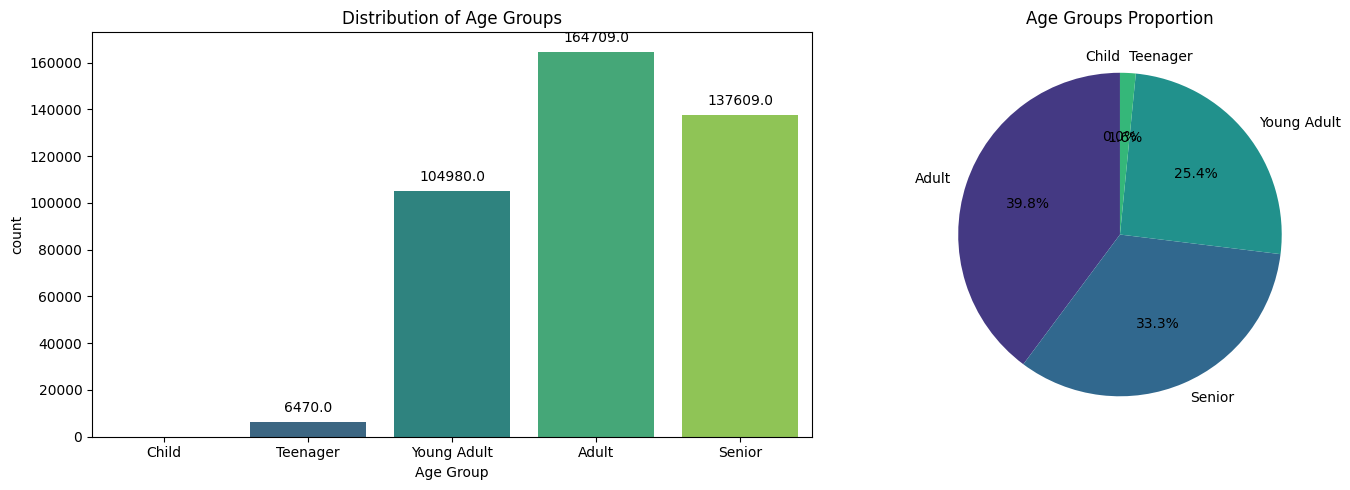

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot chart
sns.countplot(x='Age Group', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Age Groups')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('viridis', len(df['Age Group'].value_counts()))
axes[1].pie(df['Age Group'].value_counts(), labels=df['Age Group'].value_counts().index, autopct='%1.1f%%', startangle=90, colors= colors)
axes[1].set_title('Age Groups Proportion')

# Chart show
plt.tight_layout()
plt.show()


####**Key Insights:**
Dominance of Adults and Young Adults:

Adults (39.8%) and Young Adults (33.3%) form the largest segments of the dataset. This indicates that the majority of the population surveyed falls into these two age groups.

Significant Proportion of Teenagers:

Teenagers (25.4%) also represent a substantial portion of the dataset. This suggests that a considerable number of individuals surveyed are in their teenage years.

Minimal Representation of 18+ Child Group:

The 18+ Child Group (0.08%) has the smallest representation, which is understandable given that the dataset includes individuals starting from 18 years old.

Summary:
The distribution is skewed towards adults and young adults, reflecting that most surveyed individuals are in these age groups.

The significant proportion of teenagers highlights the importance of this demographic in the dataset.

The minimal presence of the 18+ child group indicates that few individuals are classified as children in this dataset.

###**Marital Status**

<ipython-input-56-b1a5143a93b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital Status', data=df, palette='plasma', ax=axes[0])


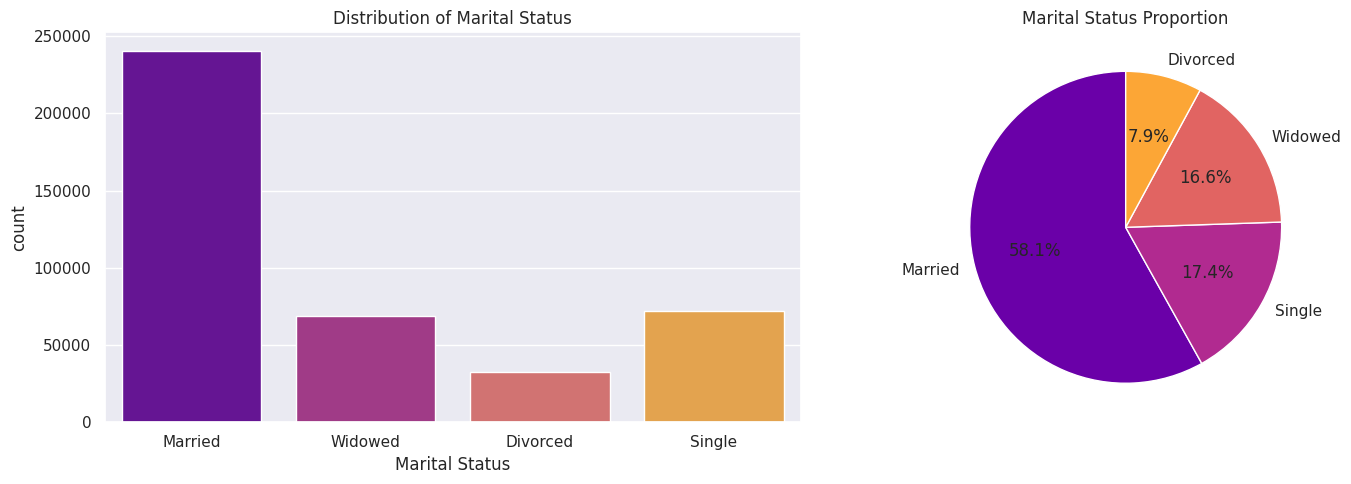

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot chart
sns.countplot(x='Marital Status', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Distribution of Marital Status')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('plasma', len(df['Marital Status'].value_counts()))
axes[1].pie(df['Marital Status'].value_counts(), labels=df['Marital Status'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Marital Status Proportion')

# Chart show
plt.tight_layout()
plt.show()

####**Key Insights**
The distribution chart provides a detailed breakdown of the population by marital status within the dataset. Here are the key insights:

Married (58.1%):

The largest segment, with approximately 250,000 individuals. This dominant percentage highlights the significant representation of married individuals within the dataset.

Single (17.4%):

The second-largest segment, with around 75,000 individuals. This notable portion indicates a considerable number of individuals who are unmarried.

Widowed (16.6%):

A significant segment, with about 50,000 individuals. The presence of a large number of widowed individuals reflects important demographic characteristics within the dataset.

Divorced (7.9%):

The smallest segment, with around 25,000 individuals. Though the smallest group, the number of divorced individuals is still substantial.

Overall Distribution Insight:
The distribution of marital status within the dataset shows that a majority of the population is married, followed by significant portions of single and widowed individuals, and a smaller group of divorced individuals. This distribution provides valuable insights into the marital composition of the surveyed population, highlighting the diverse relationship statuses present.

###**Number of Children**

<ipython-input-61-1112d7bd63a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Number of Children', data=df, palette='viridis', ax=axes[0])


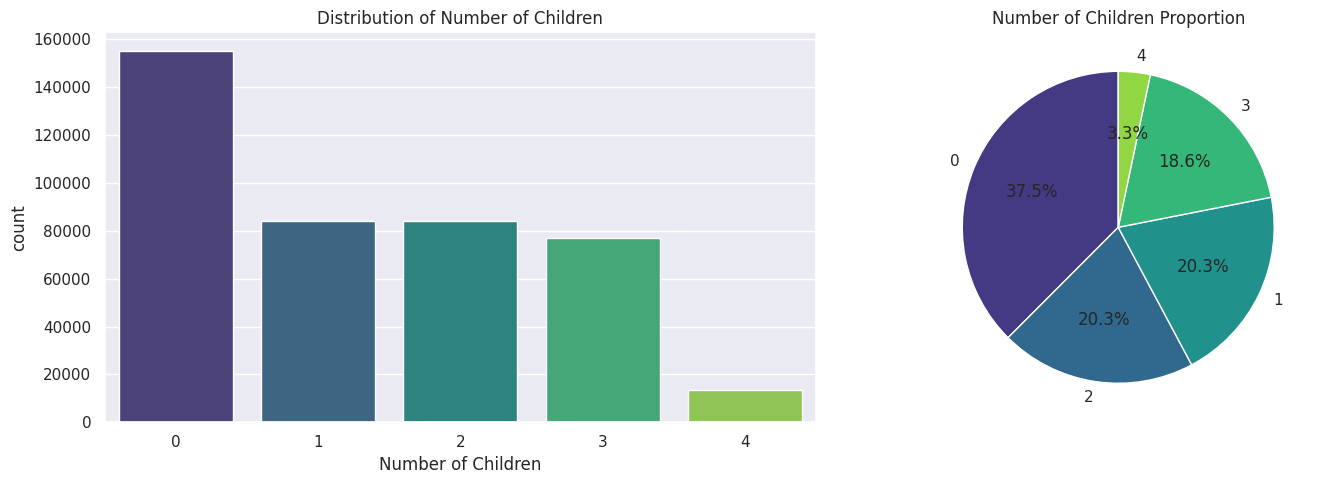

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot chart
sns.countplot(x='Number of Children', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Number of Children')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('viridis', len(df['Number of Children'].value_counts()))
axes[1].pie(df['Number of Children'].value_counts(), labels=df['Number of Children'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Number of Children Proportion')

# Chart show
plt.tight_layout()
plt.show()

####**Key Insights**

0 Children (37.5%):

The largest segment, with approximately 160,000 individuals. This significant percentage highlights a high number of individuals without children.

1 Child (20.3%):

The second-largest segment, with around 80,000 individuals. This notable portion indicates a considerable number of individuals with one child.

2 Children (20.3%):

Equal in size to the 1-child group, with around 80,000 individuals. This shows that having two children is also a common family structure.

3 Children (18.6%):

A significant segment, with about 60,000 individuals. The presence of a large number of individuals with three children reflects important demographic characteristics within the dataset.

4 Children (3.3%):

The smallest segment, with around 10,000 individuals. Though the smallest group, the number of individuals with four children is still noteworthy.

Overall Distribution Insight:
The distribution of the number of children within the dataset shows that a majority of the surveyed individuals have no children, followed by significant portions with one or two children, and smaller groups with three or four children. This distribution provides valuable insights into the family composition of the surveyed population, highlighting the diverse family sizes present.

####**Relationship between Marital Status and Number of Children**

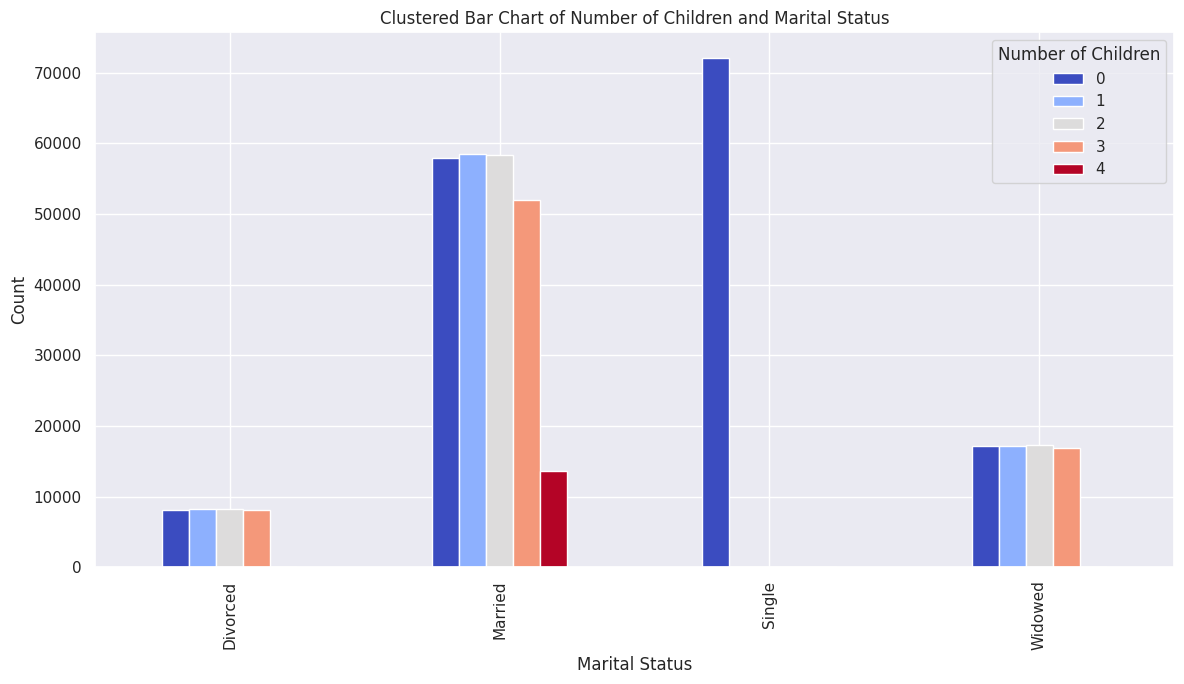

In [ ]:
# Create a new dataset including Marital Status and Number of Children
df_grouped = df.groupby(['Marital Status', 'Number of Children']).size().unstack(fill_value=0)

# Plot clustered bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 7), colormap='coolwarm')
plt.title('Clustered Bar Chart of Number of Children and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Number of Children', labels=['0', '1', '2', '3', '4'])

# Show the plot
plt.tight_layout()
plt.show()


####**Key Insights from the Marital Status and Number of Children Chart**

Single Individuals:

The highest count is for single individuals with 0 children, significantly higher than any other group. This indicates that a large portion of single individuals do not have children.

Married Individuals:

Married individuals show a more diverse distribution across different numbers of children, with the highest counts for 0, 1, and 2 children. This suggests that married couples tend to have children more often than other marital statuses, with varying family sizes.

Divorced and Widowed Individuals:

Both divorced and widowed individuals have relatively lower counts across all categories of children, with a slight preference for 0 and 1 child. This indicates that these groups are less likely to have multiple children compared to married individuals.

General Trend:

The majority of individuals across all marital statuses tend to have 0 children, followed by 1 and 2 children. The counts decrease as the number of children increases. This trend suggests that smaller family sizes are more common in the survey population.

###**Education Level**

<ipython-input-71-bc53d77893d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education Level', data=df, palette='plasma', ax=axes[0])


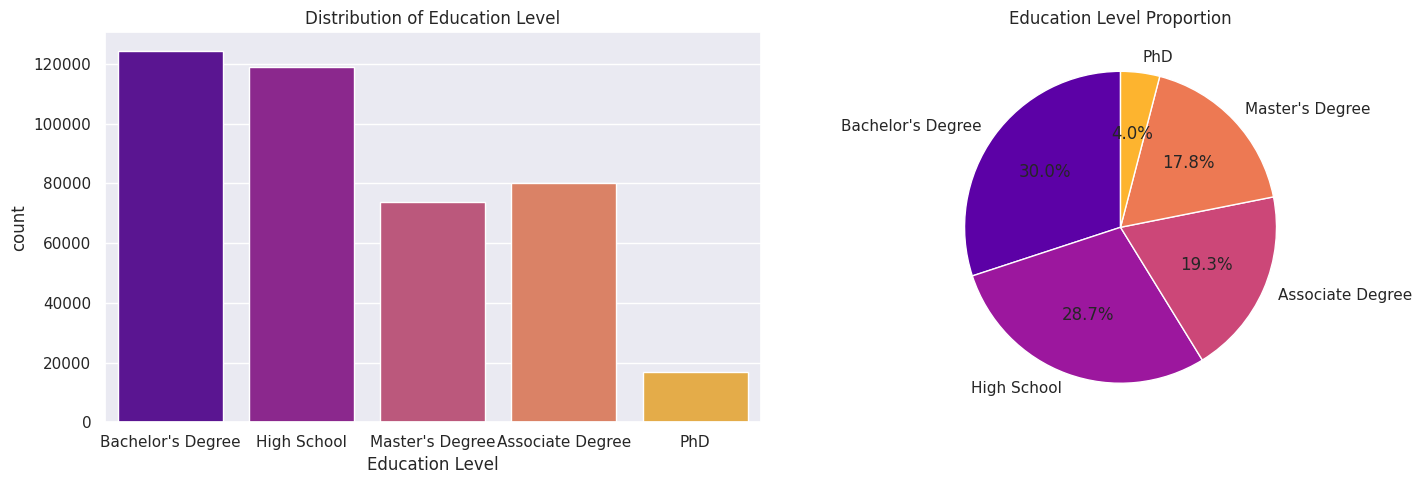

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot chart
sns.countplot(x='Education Level', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Distribution of Education Level')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('plasma', len(df['Education Level'].value_counts()))
axes[1].pie(df['Education Level'].value_counts(), labels=df['Education Level'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Education Level Proportion')

# Chart show
plt.tight_layout()
plt.show()

####**Key Insights**
Bachelor's Degree (30.0%):

The largest segment, with approximately 120,000 individuals. This significant percentage highlights the high number of individuals who have attained a bachelor's degree.

High School (28.7%):

The second-largest segment, with around 115,000 individuals. This notable portion indicates a considerable number of individuals with high school education.

Associate Degree (19.3%):

A significant segment, with about 80,000 individuals. The presence of a large number of individuals with an associate degree reflects important demographic characteristics within the dataset.

Master's Degree (17.8%):

A substantial portion, with approximately 70,000 individuals. This indicates a significant representation of individuals who have attained a master's degree.

PhD (4.0%):

The smallest segment, with around 15,000 individuals. Though the smallest group, the number of individuals with a PhD is still noteworthy.

Overall Distribution Insight:
The distribution of education levels within the dataset shows that the majority of the surveyed individuals have attained higher education degrees, with bachelor's degrees being the most common, followed by high school education. The presence of associate and master's degree holders is also substantial, while PhD holders form the smallest group.

###**Smoking Status**

<ipython-input-72-0b6a49fdb719>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking Status', data=df, palette='viridis', ax=axes[0])


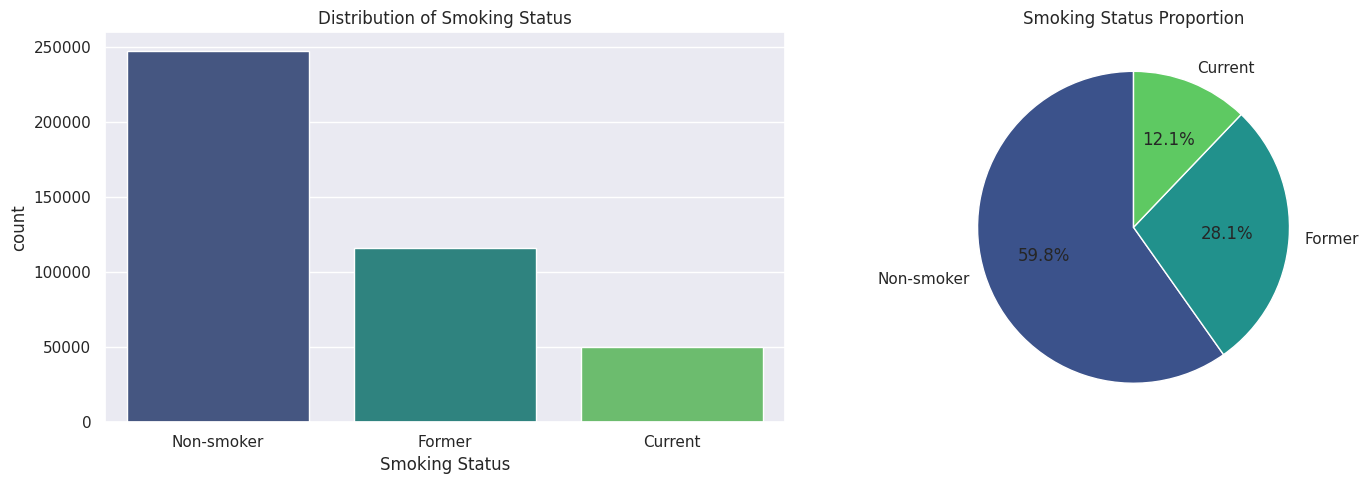

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot chart
sns.countplot(x='Smoking Status', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Smoking Status')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('viridis', len(df['Smoking Status'].value_counts()))
axes[1].pie(df['Smoking Status'].value_counts(), labels=df['Smoking Status'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Smoking Status Proportion')

# Chart show
plt.tight_layout()
plt.show()


####**Key Insights**

Non-smoker (59.8%):

The largest segment, with approximately 250,000 individuals. This dominant percentage indicates a significant majority of the population are non-smokers.

Former Smokers (28.1%):

The second-largest segment, with around 125,000 individuals. This notable portion suggests a considerable number of individuals have quit smoking.

Current Smokers (12.1%):

The smallest segment, with about 50,000 individuals. This indicates that a smaller, but still significant, part of the population continues to smoke.

Overall Distribution Insight:
The distribution of smoking status within the dataset shows that a majority of the surveyed individuals are non-smokers, followed by a substantial portion of former smokers, and a smaller group of current smokers.

###**Physical Activity level**

<ipython-input-73-a513f722ff10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Physical Activity Level', data=df, palette='plasma', ax=axes[0])


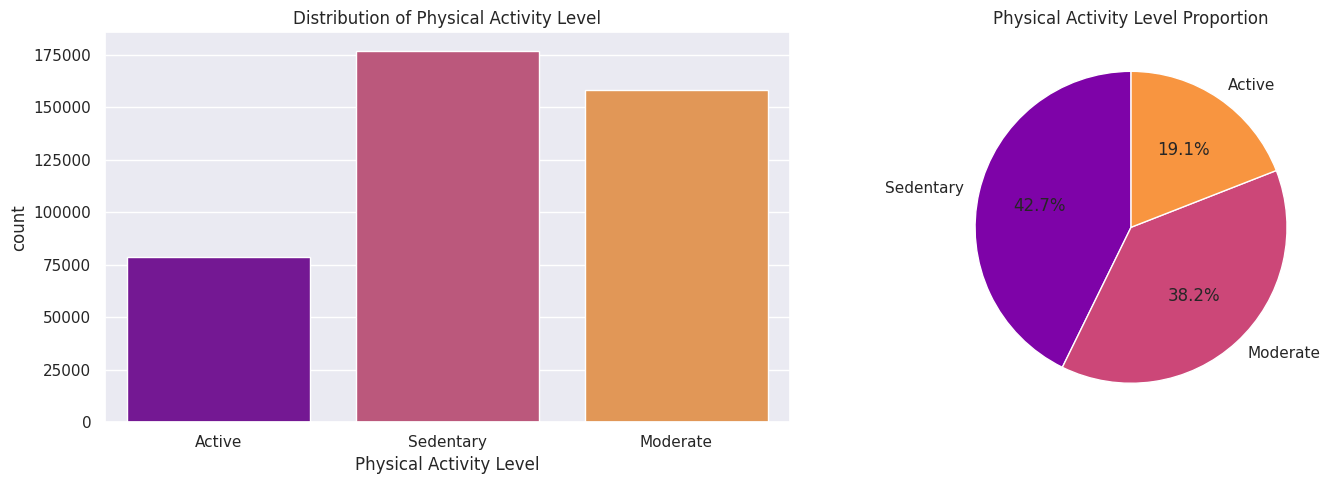

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot chart
sns.countplot(x='Physical Activity Level', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Distribution of Physical Activity Level')
# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Pie chart
colors = sns.color_palette('plasma', len(df['Physical Activity Level'].value_counts()))
axes[1].pie(df['Physical Activity Level'].value_counts(), labels=df['Physical Activity Level'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Physical Activity Level Proportion')

# Chart show
plt.tight_layout()
plt.show()

#### **Key Insights**

1. **Sedentary (42.7%)**:
   - The largest segment, with approximately 175,000 individuals. This dominant percentage highlights a significant portion of the population leading a sedentary lifestyle.

2. **Moderate (38.2%)**:
   - The second-largest segment, with around 150,000 individuals. This indicates that a considerable portion of the population engages in moderate physical activity.

3. **Active (19.1%)**:
   - The smallest segment, with about 75,000 individuals. This suggests that a smaller, yet significant, portion of the population is physically active.

#### Overall Distribution Insight:

The distribution of physical activity levels within the dataset shows that the majority of the surveyed individuals are either sedentary or engage in moderate physical activity, with a smaller group being active.

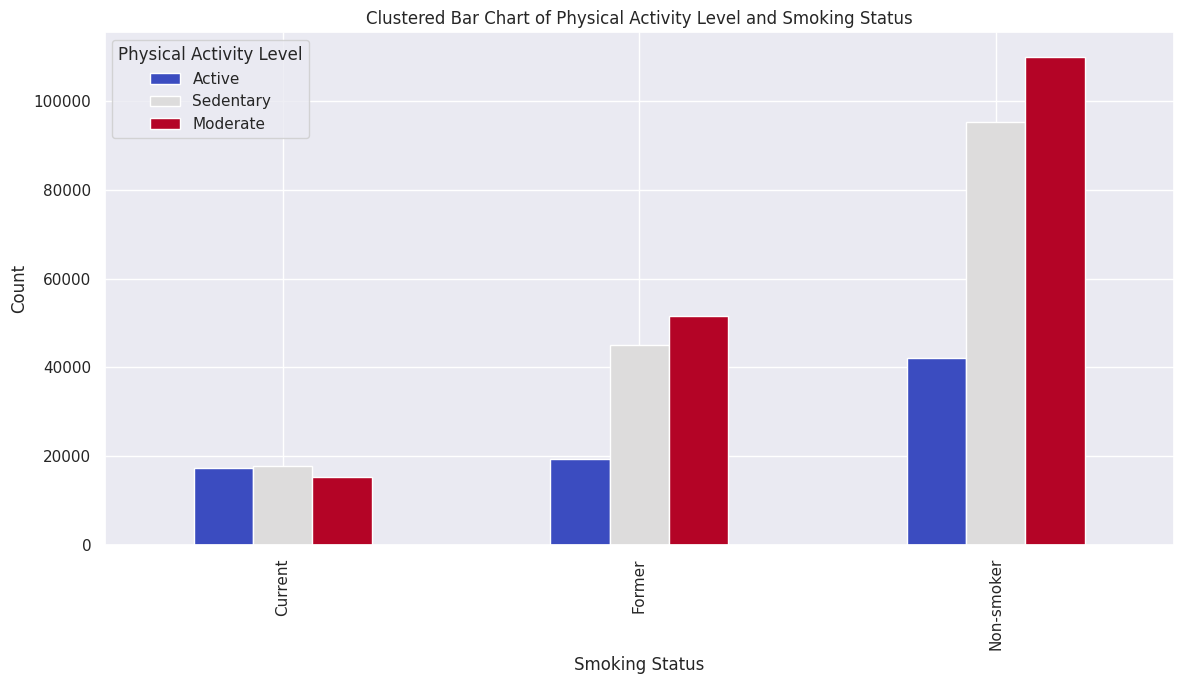

In [ ]:
# Create a new dataset including Smoking Status and Physical Activity Level
df_grouped = df.groupby(['Smoking Status', 'Physical Activity Level']).size().unstack(fill_value=0)

# Plot clustered bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 7), colormap='coolwarm')
plt.title('Clustered Bar Chart of Physical Activity Level and Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Physical Activity Level', labels=df['Physical Activity Level'].unique())

# Show the plot
plt.tight_layout()
plt.show()


###**Employment Status**

<ipython-input-77-168f0dbf96d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Employment Status', data=df, palette='viridis', ax=axes[0])


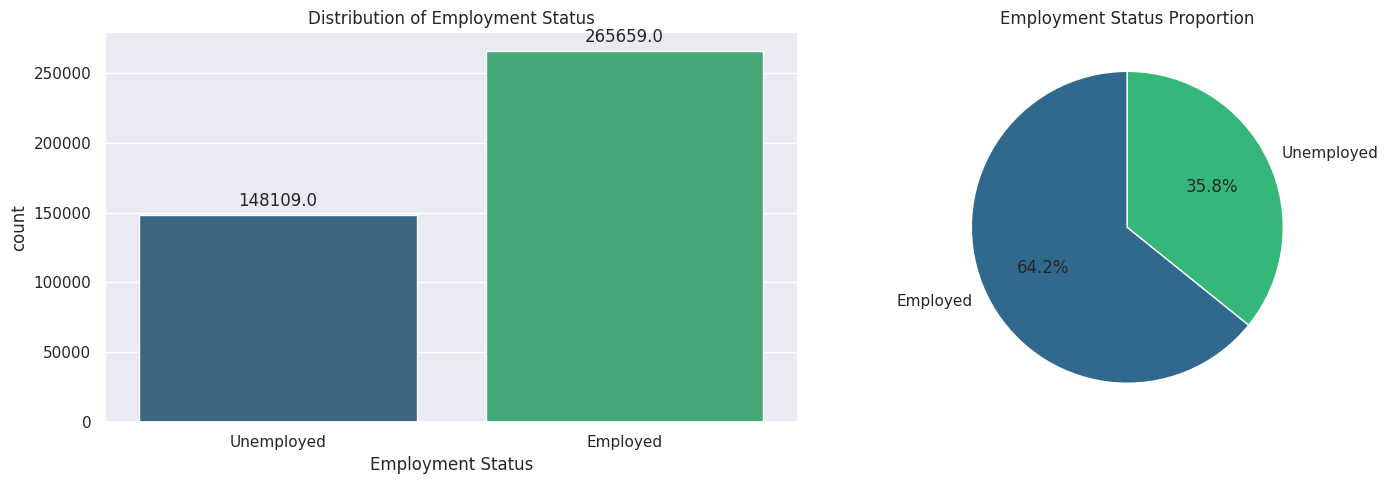

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot chart
sns.countplot(x='Employment Status', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Employment Status')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('viridis', len(df['Employment Status'].value_counts()))
axes[1].pie(df['Employment Status'].value_counts(), labels=df['Employment Status'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Employment Status Proportion')

# Chart show
plt.tight_layout()
plt.show()


#### **Key Insights**

The employment status distribution chart reveals the following key insights:

1. **Employed (64.2%)**:
   - The majority of the surveyed population is employed, with approximately 265,659 individuals. This dominant percentage highlights a significant portion of the population actively engaged in work.

2. **Unemployed (35.8%)**:
   - A substantial portion of the population, with around 148,109 individuals, is unemployed. This indicates that over a third of the surveyed individuals are currently without employment.

#### Overall Distribution Insight:

The chart shows a clear majority of employed individuals, yet a significant proportion of the population remains unemployed. This distribution provides valuable insights into the employment landscape of the surveyed individuals.

####**Relationship between Employment Status and Education Level**

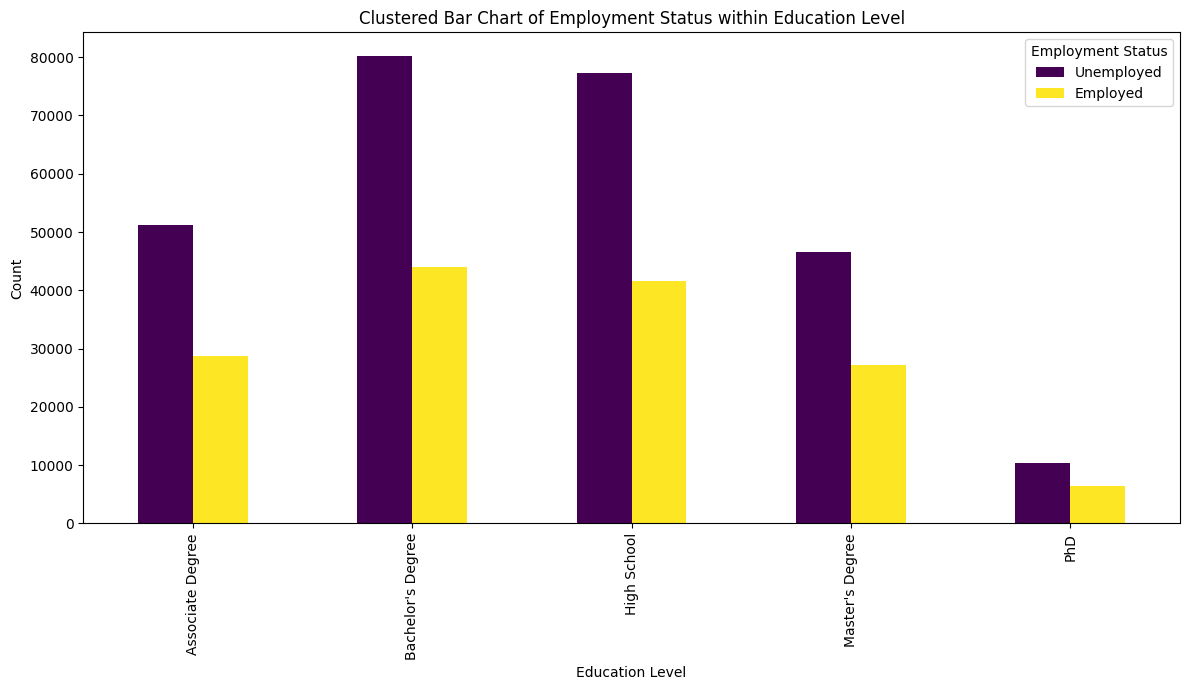

In [ ]:
# Create a new dataset including Education Level and Employment Status
df_grouped = df.groupby(['Education Level', 'Employment Status']).size().unstack(fill_value=0)

# Plot clustered bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 7), colormap='viridis')
plt.title('Clustered Bar Chart of Employment Status within Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Employment Status', labels=df['Employment Status'].unique())

# Show the plot
plt.tight_layout()
plt.show()

####**Key Insights**

1. **Employed Individuals**:
   - Across all education levels, the number of employed individuals is consistently higher than that of unemployed individuals.
   - The highest counts of employed individuals are seen in the Bachelor's Degree and High School categories, each with approximately 80,000 individuals.
   - The lowest count of employed individuals is observed in the PhD category, with fewer than 10,000 individuals.

2. **Unemployed Individuals**:
   - The number of unemployed individuals is relatively lower across all education levels.
   - Similar to employed individuals, the Bachelor's Degree and High School categories have the highest counts of unemployed individuals, around 40,000 each.
   - The Master's Degree category shows a significant difference, with a noticeable gap between employed and unemployed individuals, with unemployed individuals being fewer.

#### Overall Distribution Insight:

The chart provides a clear overview of the employment status distribution by education level. It highlights that higher education levels are generally associated with higher employment rates, and the counts of unemployed individuals are lower across all categories. This distribution offers valuable insights into the relationship between education level and employment status, indicating the potential benefits of higher education in securing employment.

###**Income**

<ipython-input-35-de93c2369bce>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Income', multiple='stack', palette='viridis', ax=axes, kde=True)


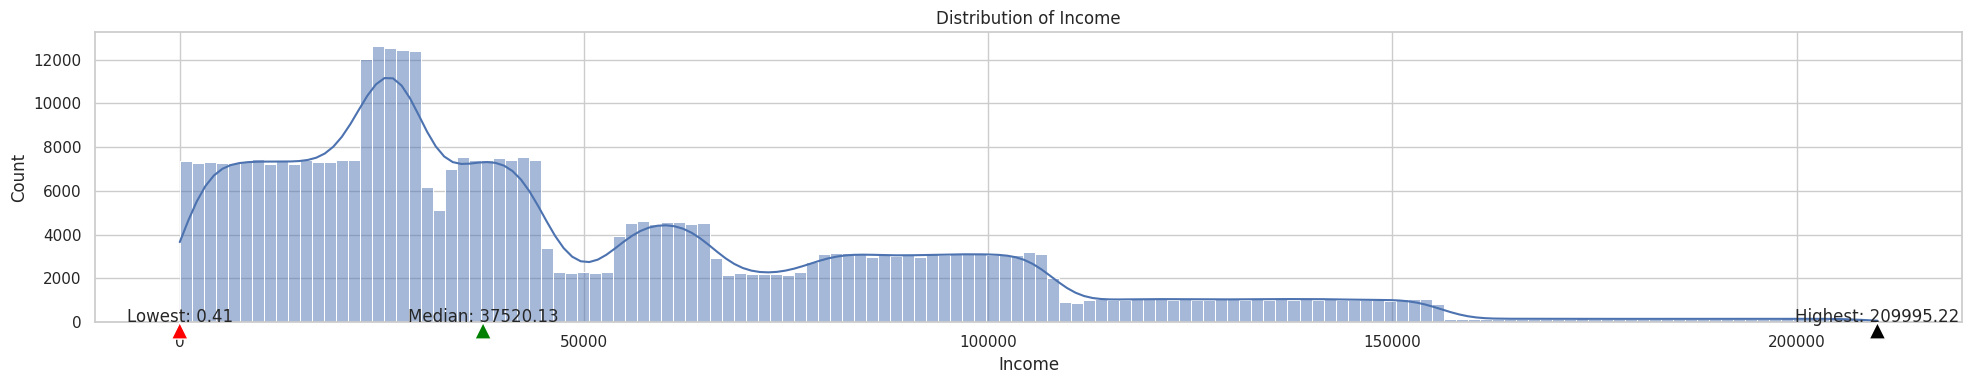

In [ ]:
# Set style for plot
sns.set(style="whitegrid")

# Create fig and subplot
fig, axes = plt.subplots(figsize=(20, 4))

# Income plot with KDE
sns.histplot(data=df, x='Income', multiple='stack', palette='viridis', ax=axes, kde=True)
axes.set_title('Distribution of Income')
axes.set_xlabel('Income')
axes.set_ylabel('Count')

# Calculate statistics
max_income = df['Income'].max()
min_income = df['Income'].min()
mean_income = df['Income'].mean()
median_income = df['Income'].median()

# Annotate the highest point
axes.annotate(f'Highest: {max_income}', xy=(max_income, 0), xytext=(max_income, 10),
              arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# Annotate the lowest point
axes.annotate(f'Lowest: {min_income}', xy=(min_income, 0), xytext=(min_income, 10),
              arrowprops=dict(facecolor='red', shrink=0.05), ha='center')

# Annotate the median point
axes.annotate(f'Median: {median_income:.2f}', xy=(median_income, 0), xytext=(median_income, 10),
              arrowprops=dict(facecolor='green', shrink=0.05), ha='center')

# Show the plot
plt.tight_layout()
plt.show()



#### **Key Insights**

1. **Concentration Around 20,000 to 40,000**:
   - The highest concentration of individuals is within the income range of 20,000 to 40,000. There is a noticeable peak around 30,000, indicating that many individuals fall within this income bracket.

2. **Median Income**:
   - The median income is approximately 37,520.13, which is marked with a green upward triangle. This value represents the middle point of the income distribution, where half of the individuals earn less and half earn more.

3. **Low and High Extremes**:
   - The lowest income is 0.41, marked with a red downward triangle. This suggests that there are individuals with very minimal income.
   - The highest income is 209,995.22, marked with a black upward triangle. This indicates a small number of individuals with very high incomes.

4. **Long Tail Towards Higher Incomes**:
   - The histogram shows a long tail extending towards higher incomes, indicating that while the majority of individuals have lower to moderate incomes, there are fewer individuals with very high incomes.

#### Overall Distribution Insight:

The chart reveals that the majority of surveyed individuals have incomes concentrated around 20,000 to 40,000, with the median income being approximately 37,520.13. The distribution has a long tail, indicating a smaller number of individuals with very high incomes. This distribution provides valuable insights into the income levels of the population, highlighting the concentration of incomes around the lower to moderate range and the presence of a few individuals with extreme incomes.


####**Relationship between Education Levvel and Income**

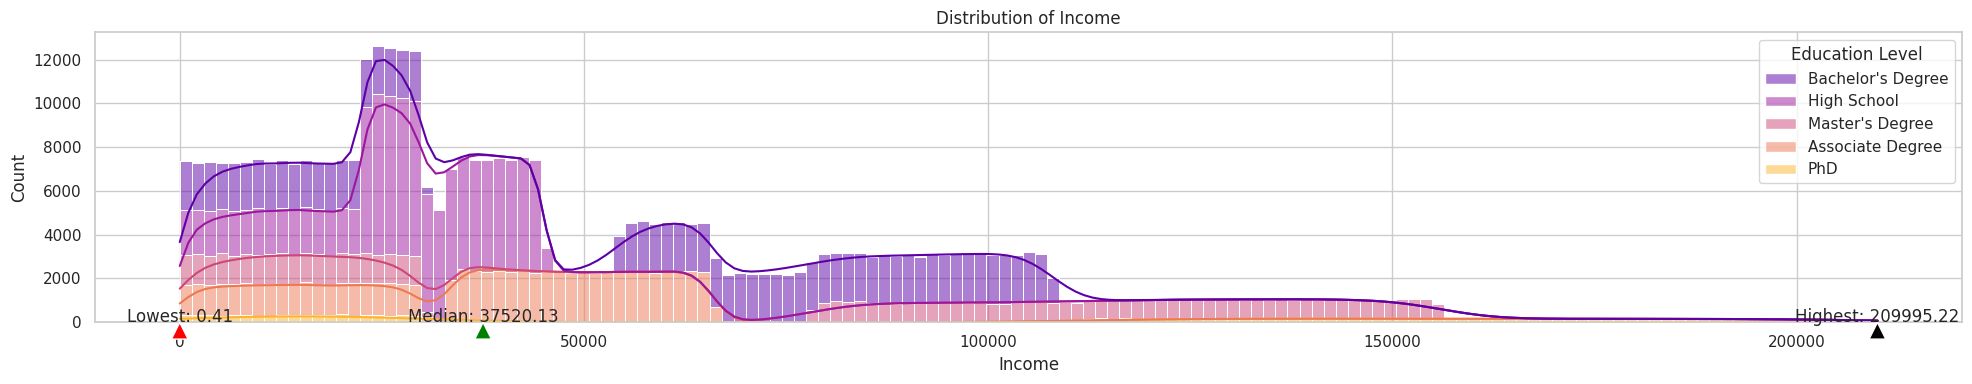

In [ ]:
# Set style for plot
sns.set(style="whitegrid")

# Create fig and subplot
fig, axes = plt.subplots(figsize=(20, 4))

# Income plot with KDE
sns.histplot(data=df, x='Income', hue='Education Level', multiple='stack', palette='plasma', ax=axes, kde=True)
axes.set_title('Distribution of Income')
axes.set_xlabel('Income')
axes.set_ylabel('Count')

# Calculate statistics
max_income = df['Income'].max()
min_income = df['Income'].min()
median_income = df['Income'].median()

# Annotate the highest point
axes.annotate(f'Highest: {max_income}', xy=(max_income, 0), xytext=(max_income, 10),
              arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# Annotate the lowest point
axes.annotate(f'Lowest: {min_income}', xy=(min_income, 0), xytext=(min_income, 10),
              arrowprops=dict(facecolor='red', shrink=0.05), ha='center')

# Annotate the median point
axes.annotate(f'Median: {median_income:.2f}', xy=(median_income, 0), xytext=(median_income, 10),
              arrowprops=dict(facecolor='green', shrink=0.05), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


#### **Key Insights**

1. **Higher Education Correlates with Higher Income**:
   - Individuals with higher educational levels, such as Master's and PhD degrees, generally have higher income levels. This is evident from the higher peaks at greater income ranges for these education categories.

2. **Bachelor's Degree**:
   - This group shows a wide distribution of income, with a noticeable peak in the mid to higher income ranges. Individuals with a Bachelor's degree are well-represented across various income levels, indicating diverse earning potentials.

3. **High School and Associate Degree**:
   - These groups predominantly occupy the lower to mid-income ranges. The distribution suggests that individuals with High School or Associate degrees tend to earn less compared to those with higher educational qualifications.

4. **Median Incomes by Education Level**:
   - The median incomes (denoted by the green triangle) increase with higher educational attainment. For instance, individuals with a PhD have a higher median income compared to those with a Master's, Bachelor's, Associate, or High School degree.

5. **Lower Income Extremes**:
   - Individuals with lower educational levels, such as High School or Associate degrees, show a higher concentration in the lower income ranges. This indicates that higher education levels generally correlate with better income prospects.

#### Overall Insight:
The chart provides a clear depiction of how educational attainment impacts income levels. Higher education levels, such as Master's and PhD degrees, are associated with higher income brackets, while lower education levels, like High School or Associate degrees, correlate with lower income levels. This distribution underscores the economic benefits of higher education and its significant role in determining income potential.

###**Alcohol Consumption**

<ipython-input-38-30a7b7560cac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Alcohol Consumption', data=df, palette='plasma', ax=axes[0])


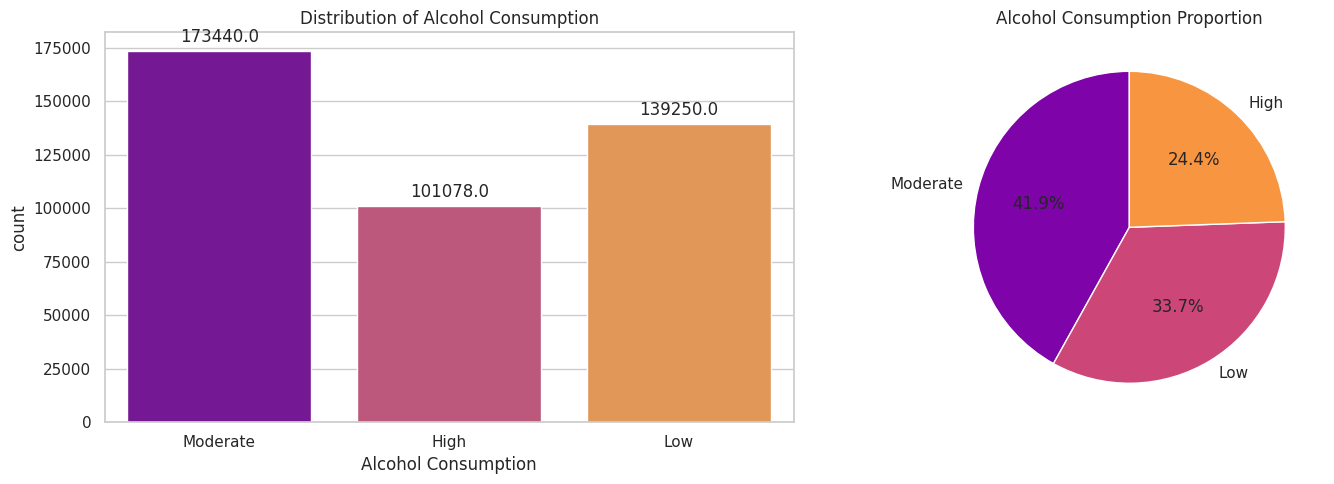

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot chart
sns.countplot(x='Alcohol Consumption', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Distribution of Alcohol Consumption')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('plasma', len(df['Alcohol Consumption'].value_counts()))
axes[1].pie(df['Alcohol Consumption'].value_counts(), labels=df['Alcohol Consumption'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Alcohol Consumption Proportion')

# Chart show
plt.tight_layout()
plt.show()


#### **Key Insights**


1. **Moderate Alcohol Consumption (41.9%)**:
   - The largest segment, with approximately 173,440 individuals. This dominant percentage indicates a significant portion of the population consumes alcohol in moderation.

2. **Low Alcohol Consumption (33.7%)**:
   - The second-largest segment, with around 139,250 individuals. This notable portion suggests a considerable number of individuals have low alcohol consumption.

3. **High Alcohol Consumption (24.4%)**:
   - The smallest segment, with about 101,078 individuals. This indicates that a smaller, but still significant, part of the population has high alcohol consumption.

#### Overall Distribution Insight:

The charts reveal that the majority of the surveyed individuals fall into the moderate and low alcohol consumption categories, with a smaller group consuming alcohol at high levels. This distribution provides valuable insights into the drinking habits of the population, highlighting the prevalence of moderate and low alcohol consumption.

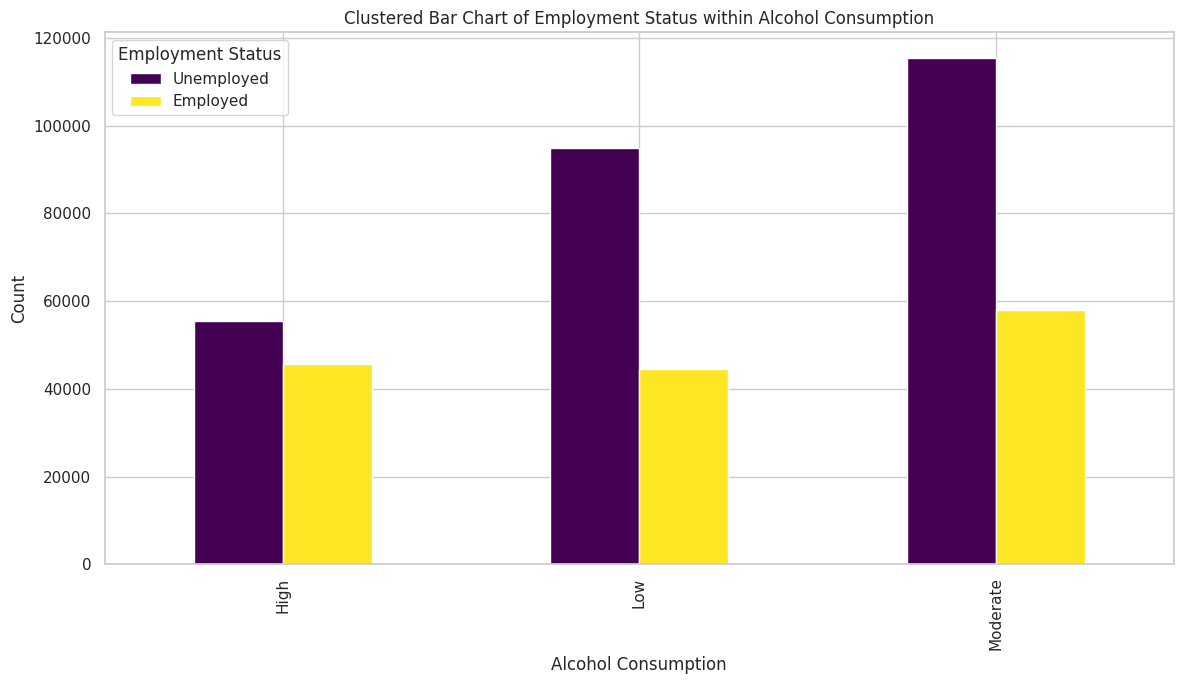

In [ ]:
# Create a new dataset including Alcohol Consumption and Employment Status
df_grouped = df.groupby(['Alcohol Consumption', 'Employment Status']).size().unstack(fill_value=0)

# Plot clustered bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 7), colormap='viridis')
plt.title('Clustered Bar Chart of Employment Status within Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.legend(title='Employment Status', labels=df['Employment Status'].unique())

# Show the plot
plt.tight_layout()
plt.show()

#### **Key Insights**

1. **High Alcohol Consumption**:
   - The count of unemployed individuals is higher than the count of employed individuals in this category. This suggests that individuals with high alcohol consumption are more likely to be unemployed.

2. **Low Alcohol Consumption**:
   - Similarly, the count of unemployed individuals is significantly higher than the count of employed individuals in this category. This indicates that individuals with low alcohol consumption also tend to have a higher unemployment rate.

3. **Moderate Alcohol Consumption**:
   - The count of unemployed individuals is higher than the count of employed individuals in this category as well. This shows that even with moderate alcohol consumption, there is a higher prevalence of unemployment.

#### Overall Insight:

The chart highlights a consistent trend across all levels of alcohol consumption: unemployed individuals tend to have higher counts compared to employed individuals. This suggests a potential correlation between alcohol consumption and employment status, where higher rates of alcohol consumption are associated with higher unemployment levels.

###**Dietary Habits**

<ipython-input-27-7e18bd8c9e81>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dietary Habits', data=df, palette='viridis', ax=axes[0])


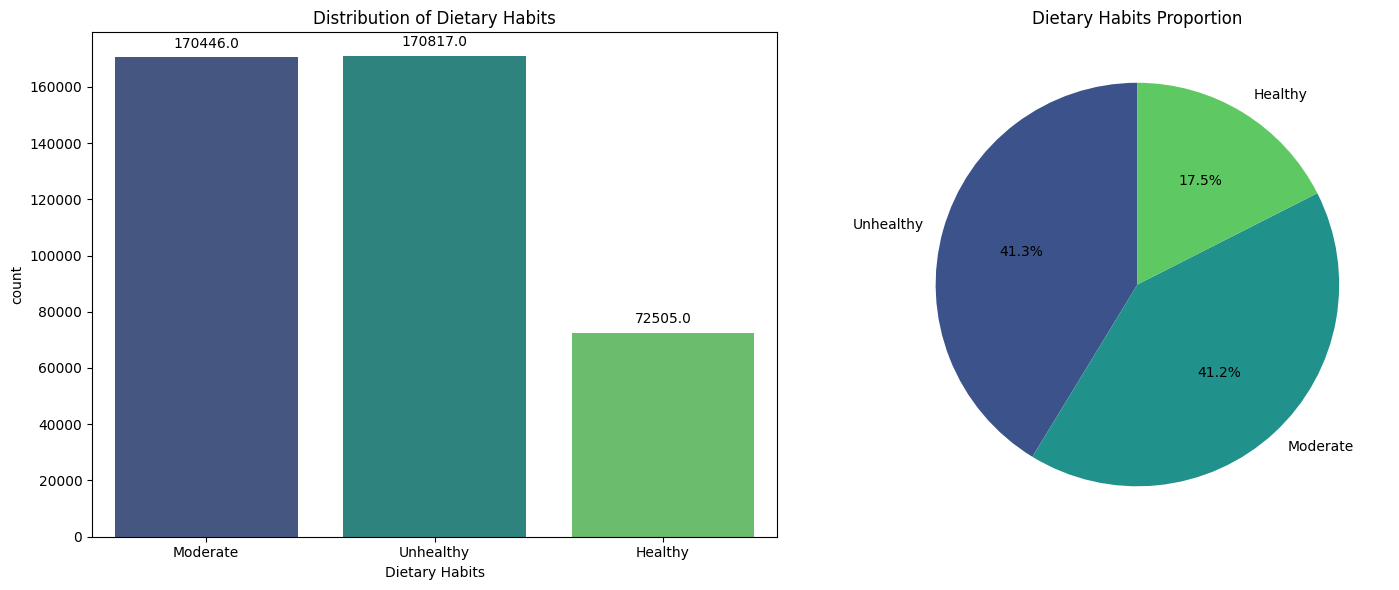

In [27]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Countplot chart
sns.countplot(x='Dietary Habits', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Dietary Habits')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('viridis', len(df['Dietary Habits'].value_counts()))
axes[1].pie(df['Dietary Habits'].value_counts(), labels=df['Dietary Habits'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Dietary Habits Proportion')

# Chart show
plt.tight_layout()
plt.show()


#### **Key Insights**

1. **Moderate Dietary Habits (41.2%)**:
   - This segment, with approximately 170,446 individuals, represents a significant portion of the population that follows moderate dietary habits.

2. **Unhealthy Dietary Habits (41.3%)**:
   - The largest segment, with around 170,817 individuals, highlights a substantial number of individuals with unhealthy dietary habits. This suggests that a considerable portion of the population may need dietary improvements.

3. **Healthy Dietary Habits (17.5%)**:
   - The smallest segment, with about 72,505 individuals, indicates that a smaller portion of the population maintains healthy dietary habits.

#### Overall Distribution Insight:

The charts reveal that the majority of surveyed individuals have either moderate or unhealthy dietary habits, with a smaller group following healthy dietary practices. This distribution provides valuable insights into the eating patterns of the population, highlighting the need for potential dietary interventions to promote healthier eating habits among a larger portion of the population.

###**Sleep patterns**

<ipython-input-28-60d9d946401b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep Patterns', data=df, palette='plasma', ax=axes[0])


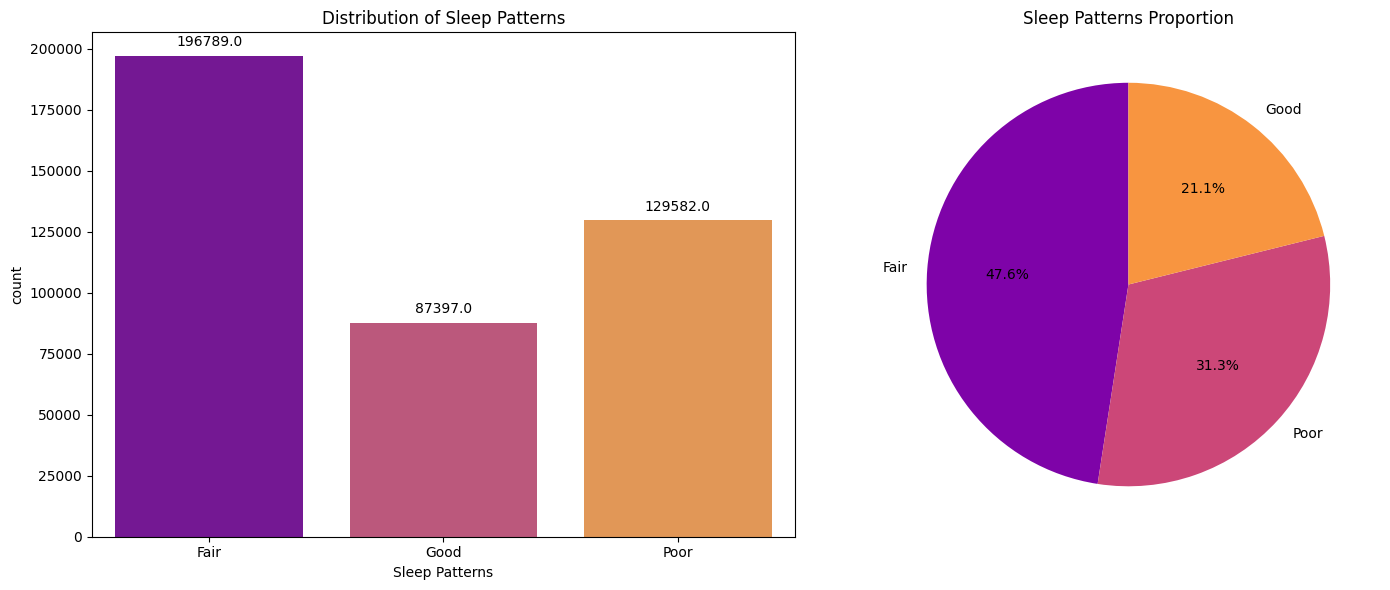

In [28]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Countplot chart
sns.countplot(x='Sleep Patterns', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Distribution of Sleep Patterns')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('plasma', len(df['Sleep Patterns'].value_counts()))
axes[1].pie(df['Sleep Patterns'].value_counts(), labels=df['Sleep Patterns'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Sleep Patterns Proportion')

# Chart show
plt.tight_layout()
plt.show()

#### **Key Insights**

1. **Fair Sleep Patterns (47.6%)**:
   - The largest segment, with approximately 196,789 individuals. This significant percentage indicates that nearly half of the population experiences fair sleep patterns.

2. **Poor Sleep Patterns (31.3%)**:
   - The second-largest segment, with around 129,582 individuals. This notable portion suggests that a substantial number of individuals have poor sleep patterns, which may be a concern for overall health and well-being.

3. **Good Sleep Patterns (21.1%)**:
   - The smallest segment, with about 87,397 individuals. This indicates that only a smaller portion of the population enjoys good sleep patterns.

#### Overall Distribution Insight:

The chart reveals that the majority of surveyed individuals experience fair or poor sleep patterns, with a smaller group having good sleep patterns. This distribution highlights the need for potential interventions to improve sleep health among a larger portion of the population.

###**History of Substance Abuse**

<ipython-input-29-5d4f93174ccb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='History of Substance Abuse', data=df, palette='viridis', ax=axes[0])


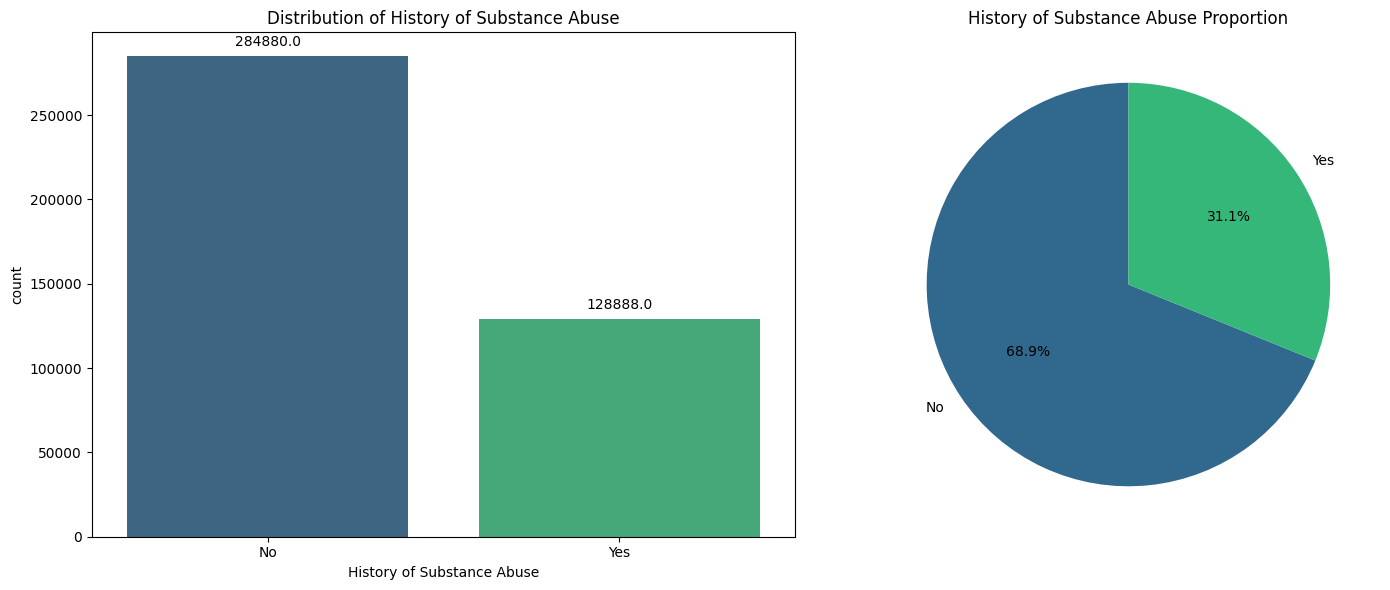

In [29]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Countplot chart
sns.countplot(x='History of Substance Abuse', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of History of Substance Abuse')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('viridis', len(df['History of Substance Abuse'].value_counts()))
axes[1].pie(df['History of Substance Abuse'].value_counts(), labels=df['History of Substance Abuse'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('History of Substance Abuse Proportion')

# Chart show
plt.tight_layout()
plt.show()


#### **Key Insights**

1. **No History of Substance Abuse (68.9%)**:
   - The majority of individuals, approximately 284,880, have no history of substance abuse. This significant percentage indicates that a large portion of the population has not experienced substance abuse issues.

2. **History of Substance Abuse (31.1%)**:
   - A substantial portion, around 128,888 individuals, have a history of substance abuse. This notable percentage highlights the presence of individuals who have struggled with substance abuse in the past.

#### Overall Distribution Insight:

The charts reveal that while the majority of the surveyed individuals have no history of substance abuse, a significant portion of the population has experienced substance abuse issues. This distribution provides valuable insights into the prevalence of substance abuse within the population, highlighting the need for support and resources for those affected.

###**Family History of Depression**

<ipython-input-15-a7c51e5290e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family History of Depression', data=df, palette='plasma', ax=axes[0])


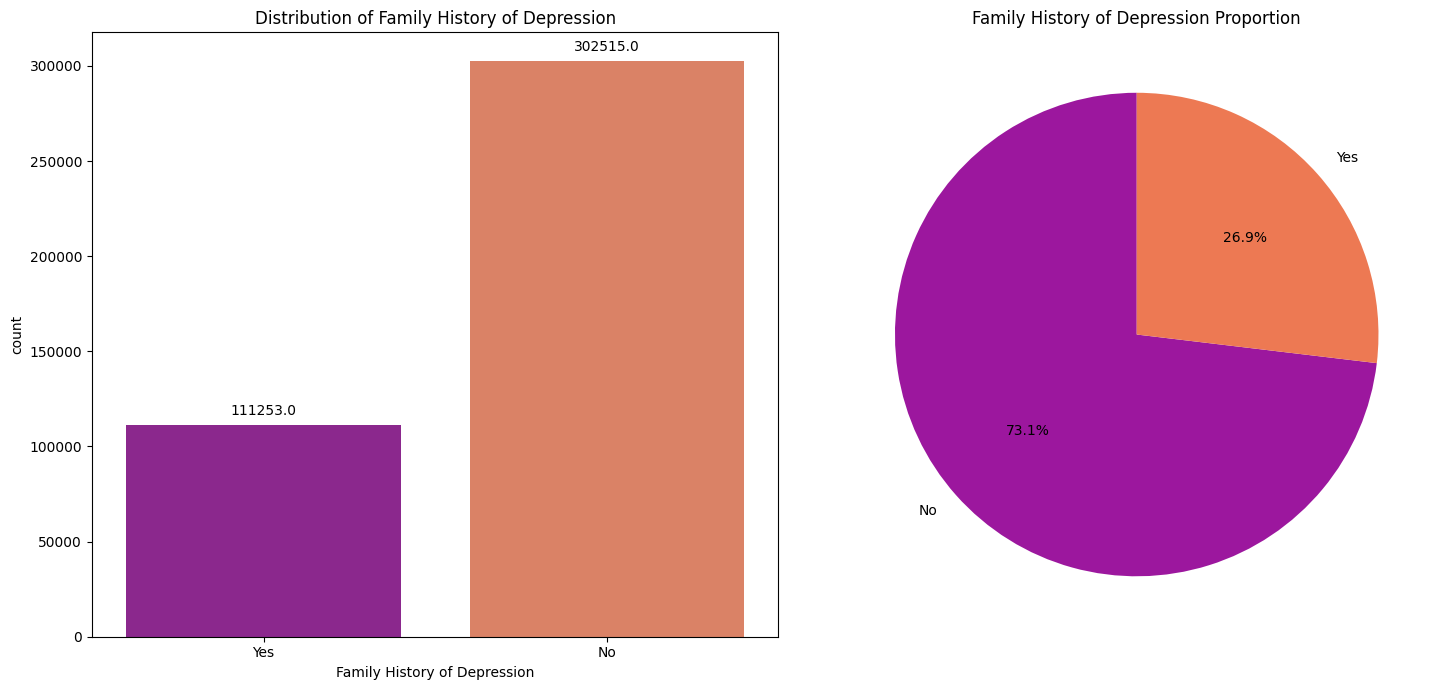

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Countplot chart
sns.countplot(x='Family History of Depression', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Distribution of Family History of Depression')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('plasma', len(df['Family History of Depression'].value_counts()))
axes[1].pie(df['Family History of Depression'].value_counts(), labels=df['Family History of Depression'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Family History of Depression Proportion')

# Chart show
plt.tight_layout()
plt.show()


#### **Key Insight**

The charts illustrate the distribution and proportion of individuals with and without a family history of depression. Here are the key insights:

1. **Prevalence of No Family History**:
   - The majority of individuals, accounting for 73.1% (302,515 individuals), do not have a family history of depression. This indicates that most individuals do not have a familial predisposition to depression.

2. **Significant Minority with Family History**:
   - A notable 26.9% (111,253 individuals) of the population has a family history of depression. This highlights a substantial portion of individuals who may be at higher risk of experiencing depression due to genetic or environmental factors.

#### Overall Insight:

The data reveals that while the majority of individuals do not have a family history of depression, a significant minority does. Understanding these proportions is essential for recognizing the potential genetic and familial influences on mental health within the population.

###**Chronic Medical Conditions**

<ipython-input-9-f901115163ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Chronic Medical Conditions', data=df, palette='plasma', ax=axes[0])


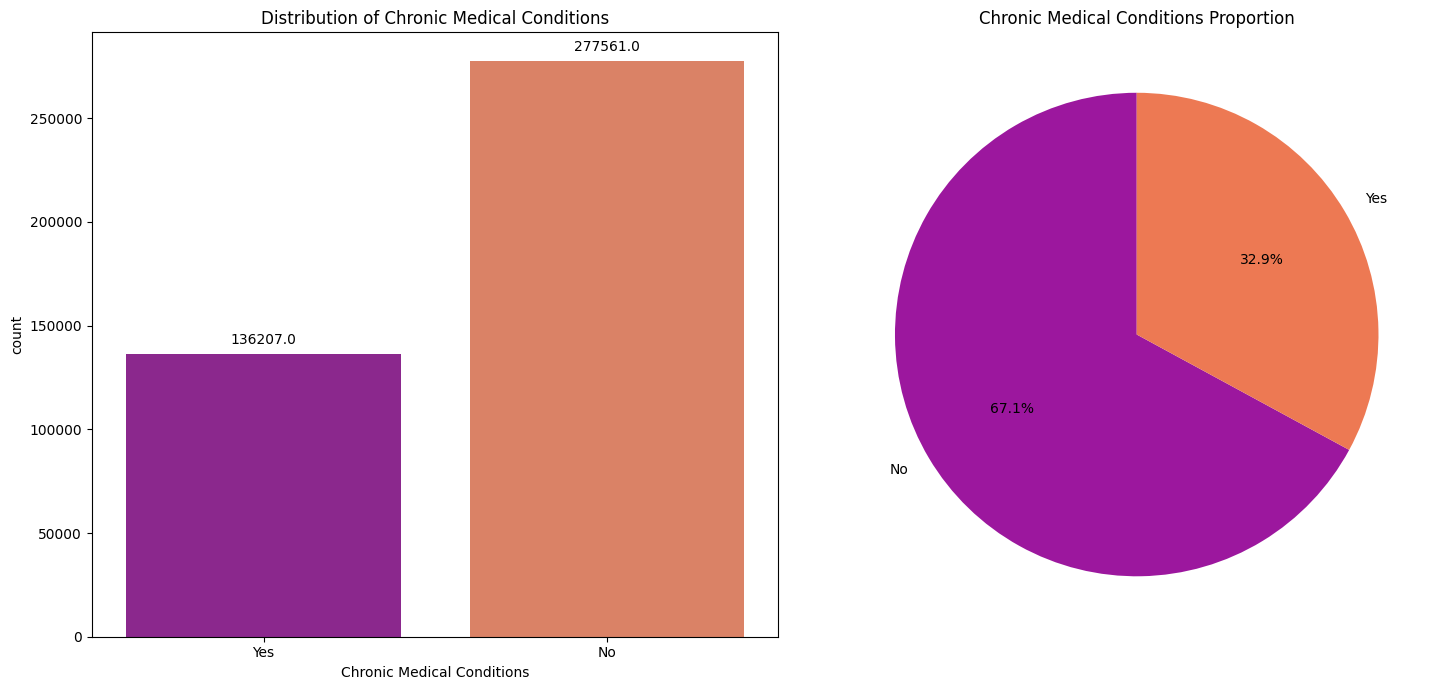

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Countplot chart
sns.countplot(x='Chronic Medical Conditions', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Distribution of Chronic Medical Conditions')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('plasma', len(df['Chronic Medical Conditions'].value_counts()))
axes[1].pie(df['Chronic Medical Conditions'].value_counts(), labels=df['Chronic Medical Conditions'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Chronic Medical Conditions Proportion')

# Chart show
plt.tight_layout()
plt.show()


####**Key Insight**

The chart provides insights into the prevalence of chronic medical conditions among the surveyed individuals. Here are the key insights:

1. **Prevalence of No Chronic Medical Conditions**:
   - The majority of individuals, accounting for 67.1% (277,561 individuals), do not have chronic medical conditions. This indicates that most of the population is free from chronic health issues.

2. **Significant Minority with Chronic Medical Conditions**:
   - A notable 32.9% (136,207 individuals) of the population has chronic medical conditions. This highlights a substantial portion of individuals who may require ongoing medical care and management.

#### Overall Insight:

The data reveals that while the majority of individuals do not have chronic medical conditions, a significant minority does. Understanding these proportions is essential for recognizing the healthcare needs and challenges faced by the population.

###**History of Mental Illness**

<ipython-input-11-e83a9d94173e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='History of Mental Illness', data=df, palette='plasma', ax=axes[0])


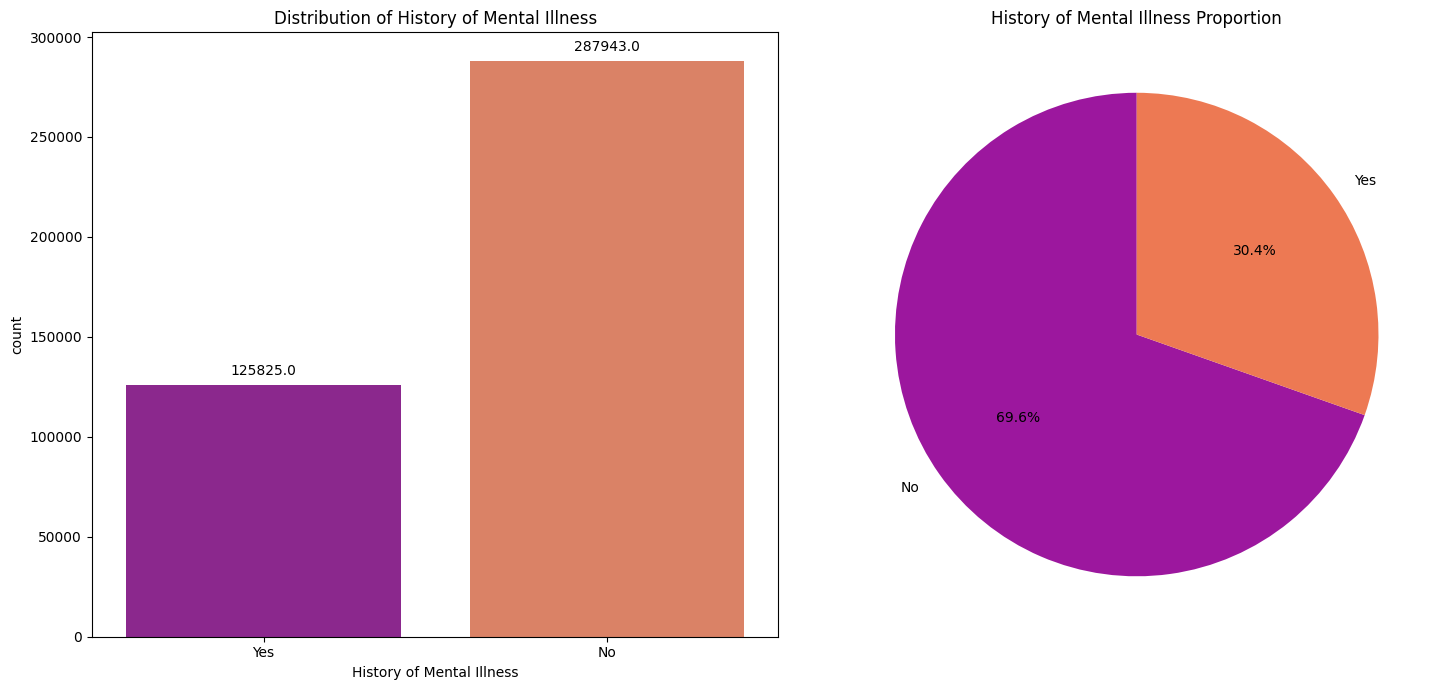

In [ ]:
# Create fig and subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Countplot chart
sns.countplot(x='History of Mental Illness', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Distribution of History of Mental Illness')

# Annotate counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Pie chart
colors = sns.color_palette('plasma', len(df['History of Mental Illness'].value_counts()))
axes[1].pie(df['History of Mental Illness'].value_counts(), labels=df['History of Mental Illness'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('History of Mental Illness Proportion')

# Chart show
plt.tight_layout()
plt.show()


#### **Key Insight**
- **Prevalence of No History**: The majority of the surveyed individuals, 69.6%, do not have a history of mental illness. This indicates that most individuals have not experienced mental illness.

- **Significant Minority with History**: A substantial 30.4% of the population does have a history of mental illness. This highlights a considerable portion of individuals who have faced mental health challenges.

#### Overall Distribution Insight:

The data reveals that while the majority of individuals do not have a history of mental illness, a significant minority does. Understanding these proportions is essential for recognizing the prevalence of mental health issues within the population. These insights can aid in developing targeted mental health interventions and support systems for those affected.

####**Relationship betweeen History of Mental Illness and other fields**

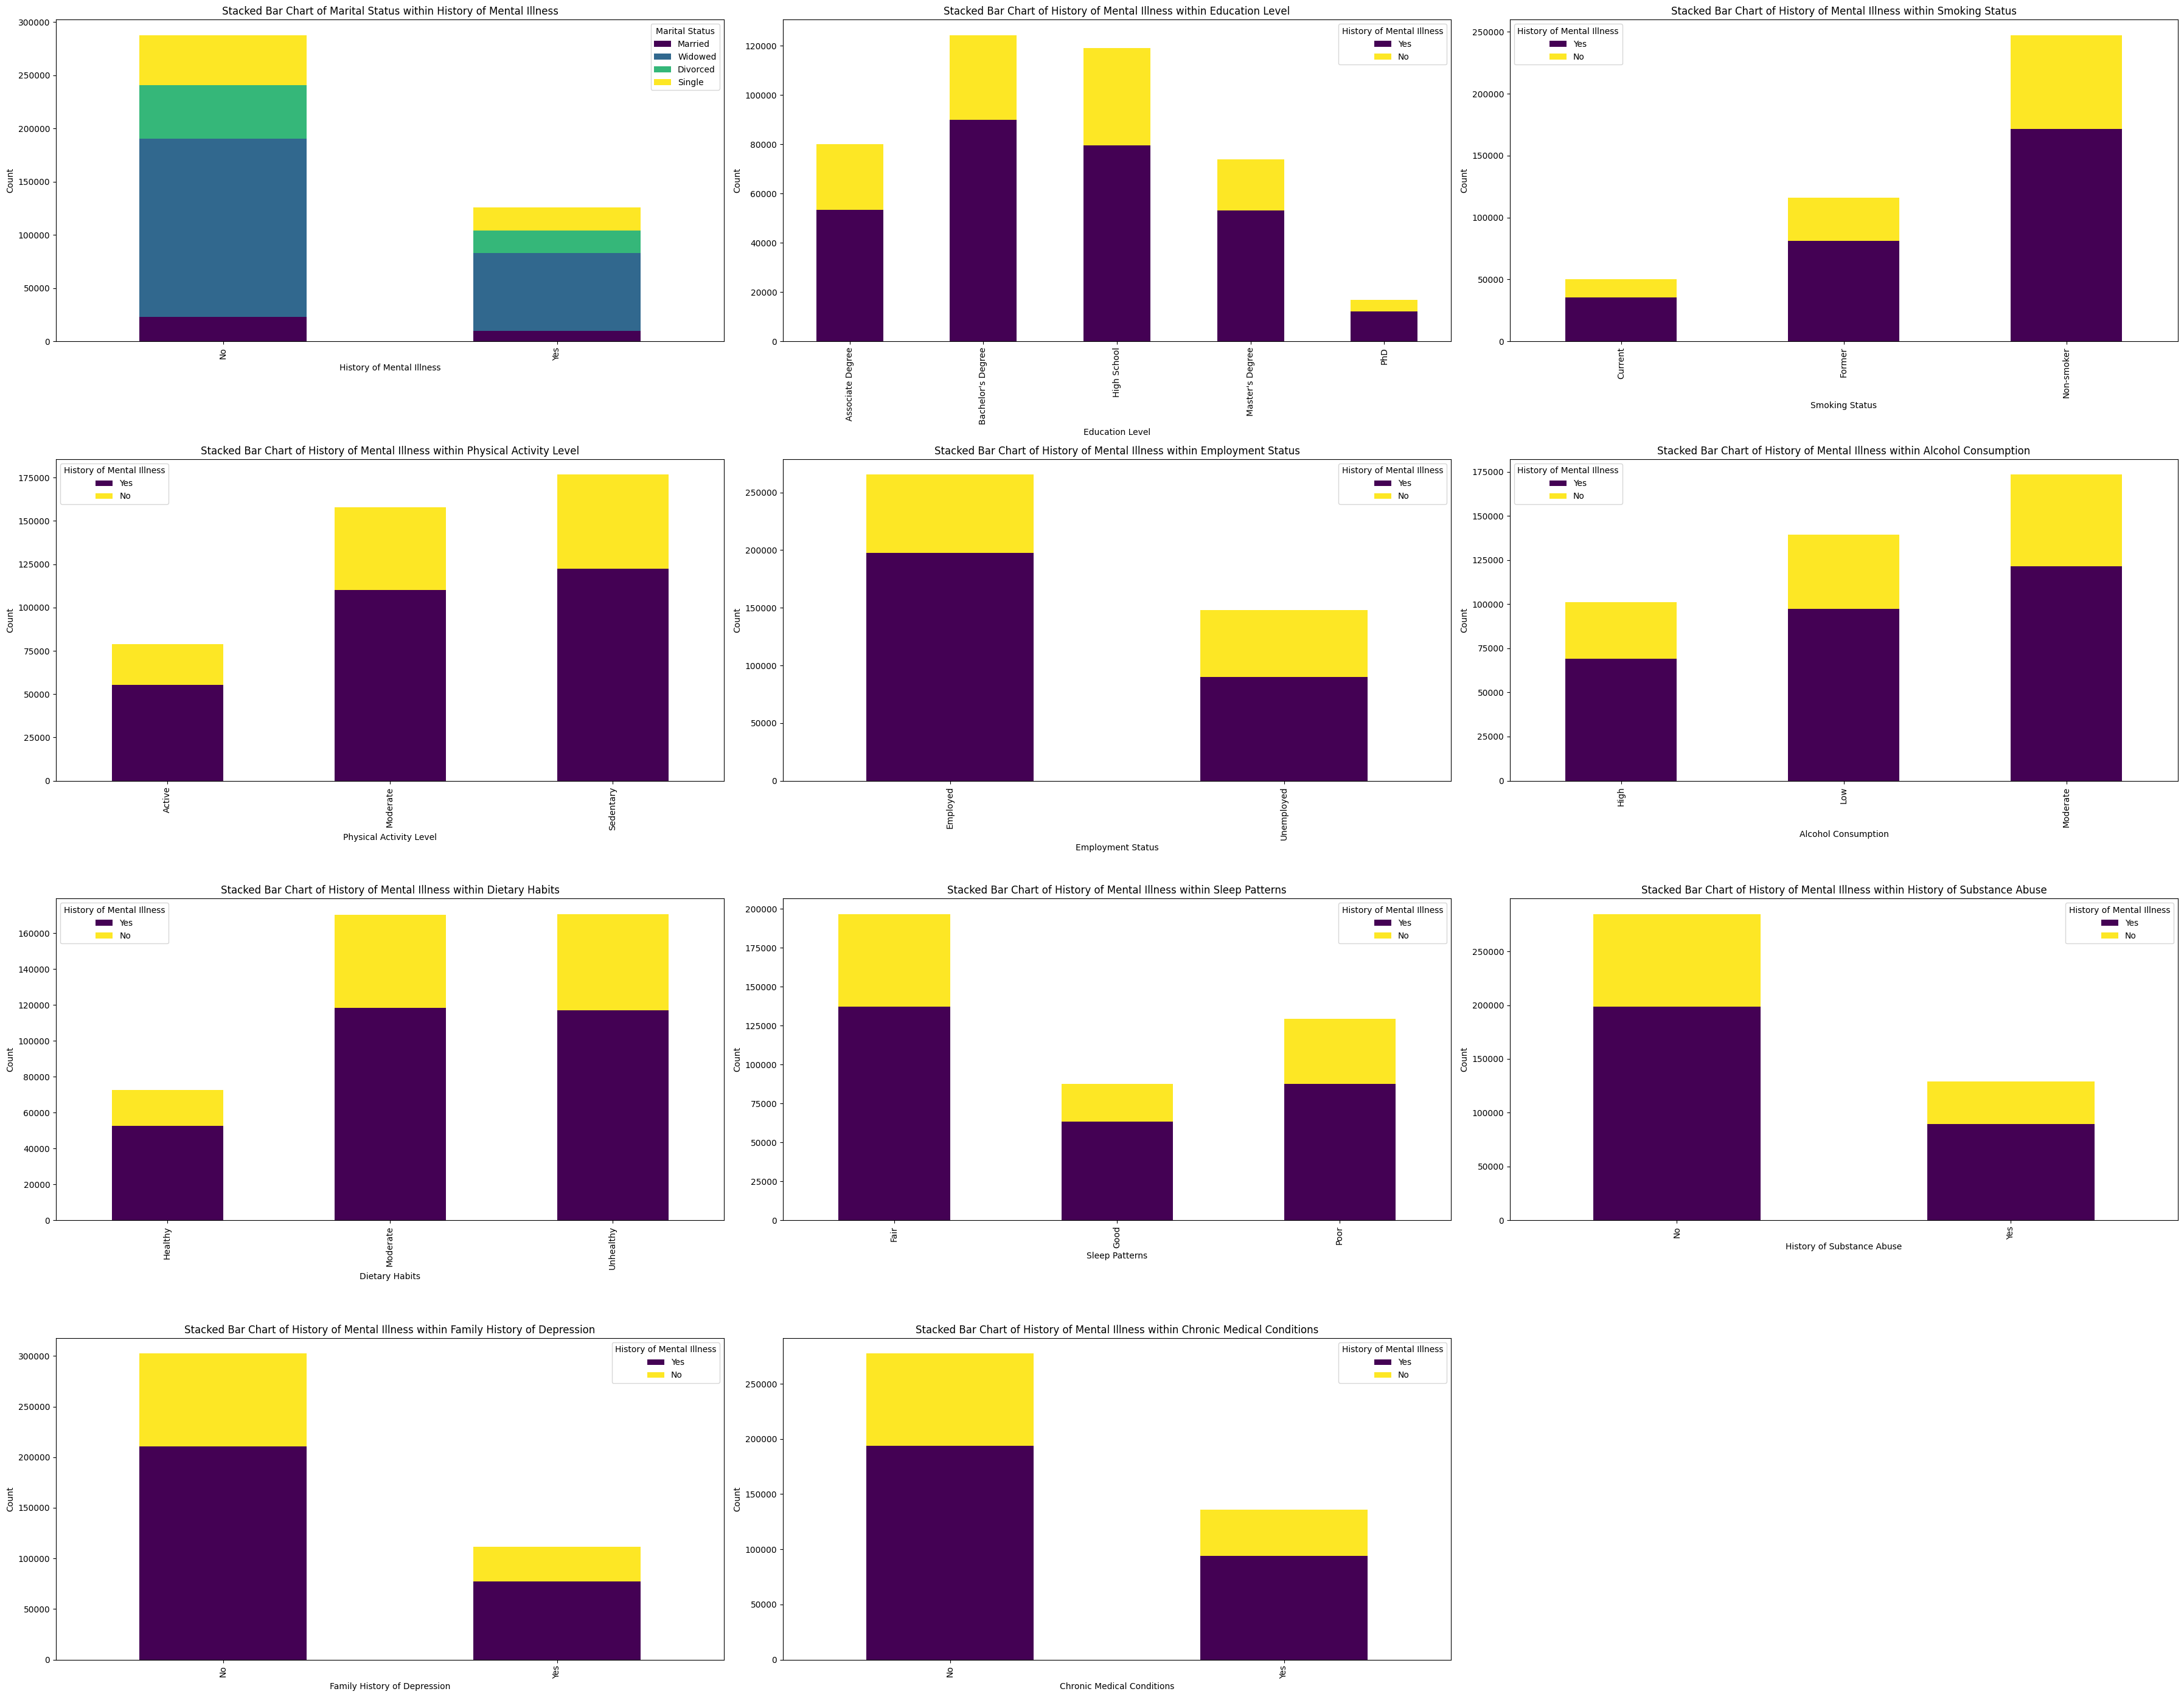

In [ ]:

# Create a new dataset including History of Mental Illness and Marital Status
df_grouped1 = df.groupby(['History of Mental Illness', 'Marital Status']).size().unstack(fill_value=0)

# Create figure and subplots
fig, axes = plt.subplots(4, 3, figsize=(36, 28))  # Add a new row

# Plot stacked bar chart for History of Mental Illness and Marital Status
df_grouped1.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title('Stacked Bar Chart of Marital Status within History of Mental Illness')
axes[0, 0].set_xlabel('History of Mental Illness')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Marital Status', labels=df['Marital Status'].unique())

# Create a new dataset including Education Level and History of Mental Illness
df_grouped2 = df.groupby(['Education Level', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Education Level and History of Mental Illness
df_grouped2.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='viridis')
axes[0, 1].set_title('Stacked Bar Chart of History of Mental Illness within Education Level')
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including Smoking Status and History of Mental Illness
df_grouped3 = df.groupby(['Smoking Status', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Smoking Status and History of Mental Illness
df_grouped3.plot(kind='bar', stacked=True, ax=axes[0, 2], colormap='viridis')
axes[0, 2].set_title('Stacked Bar Chart of History of Mental Illness within Smoking Status')
axes[0, 2].set_xlabel('Smoking Status')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including Physical Activity Level and History of Mental Illness
df_grouped4 = df.groupby(['Physical Activity Level', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Physical Activity Level and History of Mental Illness
df_grouped4.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Stacked Bar Chart of History of Mental Illness within Physical Activity Level')
axes[1, 0].set_xlabel('Physical Activity Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including Employment Status and History of Mental Illness
df_grouped5 = df.groupby(['Employment Status', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Employment Status and History of Mental Illness
df_grouped5.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Stacked Bar Chart of History of Mental Illness within Employment Status')
axes[1, 1].set_xlabel('Employment Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including Alcohol Consumption and History of Mental Illness
df_grouped6 = df.groupby(['Alcohol Consumption', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Alcohol Consumption and History of Mental Illness
df_grouped6.plot(kind='bar', stacked=True, ax=axes[1, 2], colormap='viridis')
axes[1, 2].set_title('Stacked Bar Chart of History of Mental Illness within Alcohol Consumption')
axes[1, 2].set_xlabel('Alcohol Consumption')
axes[1, 2].set_ylabel('Count')
axes[1, 2].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including Dietary Habits and History of Mental Illness
df_grouped7 = df.groupby(['Dietary Habits', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Dietary Habits and History of Mental Illness
df_grouped7.plot(kind='bar', stacked=True, ax=axes[2, 0], colormap='viridis')
axes[2, 0].set_title('Stacked Bar Chart of History of Mental Illness within Dietary Habits')
axes[2, 0].set_xlabel('Dietary Habits')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including Sleep Patterns and History of Mental Illness
df_grouped8 = df.groupby(['Sleep Patterns', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Sleep Patterns and History of Mental Illness
df_grouped8.plot(kind='bar', stacked=True, ax=axes[2, 1], colormap='viridis')
axes[2, 1].set_title('Stacked Bar Chart of History of Mental Illness within Sleep Patterns')
axes[2, 1].set_xlabel('Sleep Patterns')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including History of Substance Abuse and History of Mental Illness
df_grouped9 = df.groupby(['History of Substance Abuse', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for History of Substance Abuse and History of Mental Illness
df_grouped9.plot(kind='bar', stacked=True, ax=axes[2, 2], colormap='viridis')
axes[2, 2].set_title('Stacked Bar Chart of History of Mental Illness within History of Substance Abuse')
axes[2, 2].set_xlabel('History of Substance Abuse')
axes[2, 2].set_ylabel('Count')
axes[2, 2].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including Family History of Depression and History of Mental Illness
df_grouped10 = df.groupby(['Family History of Depression', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Family History of Depression and History of Mental Illness
df_grouped10.plot(kind='bar', stacked=True, ax=axes[3, 0], colormap='viridis')
axes[3, 0].set_title('Stacked Bar Chart of History of Mental Illness within Family History of Depression')
axes[3, 0].set_xlabel('Family History of Depression')
axes[3, 0].set_ylabel('Count')
axes[3, 0].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Create a new dataset including Chronic Medical Conditions and History of Mental Illness
df_grouped11 = df.groupby(['Chronic Medical Conditions', 'History of Mental Illness']).size().unstack(fill_value=0)

# Plot stacked bar chart for Chronic Medical Conditions and History of Mental Illness
df_grouped11.plot(kind='bar', stacked=True, ax=axes[3, 1], colormap='viridis')
axes[3, 1].set_title('Stacked Bar Chart of History of Mental Illness within Chronic Medical Conditions')
axes[3, 1].set_xlabel('Chronic Medical Conditions')
axes[3, 1].set_ylabel('Count')
axes[3, 1].legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Hide the last empty plot
fig.delaxes(axes[3, 2])

# Show the plot
plt.tight_layout()
plt.show()


####**Insights**
**1. Marital Status:**
Single, divorced, and widowed individuals show a higher count of history of mental illness compared to married individuals.

**2. Education Level:**
Individuals with lower education levels (e.g., no formal education or primary education) show a higher count of history of mental illness compared to those with higher education levels (e.g., college or university degree).

**3. Smoking Status:**
Smokers tend to have a higher count of history of mental illness compared to non-smokers.

**4. Physical Activity Level:**
Individuals with low physical activity levels show a higher count of history of mental illness compared to those with moderate or high physical activity levels.

**5. Employment Status:**
Unemployed individuals have a higher count of history of mental illness compared to employed individuals.

**6. Alcohol Consumption:**
High alcohol consumption is associated with a higher count of history of mental illness compared to moderate or low alcohol consumption.

**7. Dietary Habits:**
Poor dietary habits are linked to a higher count of history of mental illness compared to healthy dietary habits.

**8. Sleep Patterns:**
Irregular or poor sleep patterns are associated with a higher count of history of mental illness compared to regular and healthy sleep patterns.

**9. History of Substance Abuse:**
Individuals with a history of substance abuse show a higher count of history of mental illness compared to those without.

**10. Family History of Depression:**
A family history of depression is associated with a higher count of history of mental illness.

**11. Chronic Medical Conditions:**
Individuals with chronic medical conditions have a higher count of history of mental illness compared to those without.

####Overall Insight:
The data reveals multiple factors that are associated with higher prevalence rates of mental illness, including marital status, education level, smoking status, physical activity, employment status, alcohol consumption, dietary habits, sleep patterns, family history of depression, and chronic medical conditions. Understanding these relationships can aid in developing targeted interventions and support for those at higher risk of mental illness.

####**Relationship between History of Mental Illness and Age Group**

<ipython-input-25-9f5173272039>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_age = df.groupby(['Age Group', 'History of Mental Illness']).size().unstack(fill_value=0)


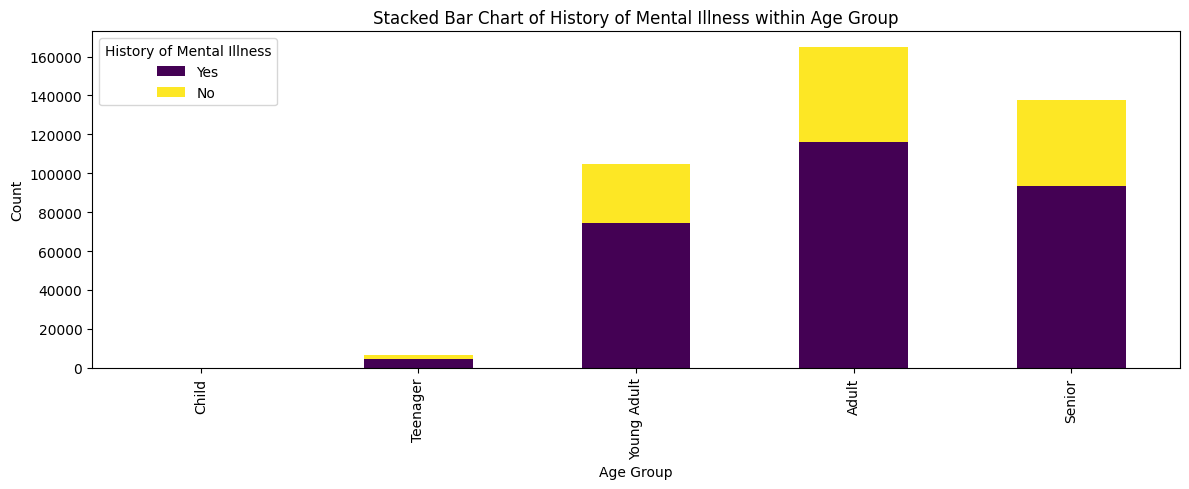

In [25]:
# Create a new dataset including Age Group and History of Mental Illness
df_grouped_age = df.groupby(['Age Group', 'History of Mental Illness']).size().unstack(fill_value=0)

# Create figure and axis
fig, axes = plt.subplots(figsize=(12, 5))

# Plot stacked bar chart for Age Group and History of Mental Illness
df_grouped_age.plot(kind='bar', stacked=True, ax=axes, colormap='viridis')
axes.set_title('Stacked Bar Chart of History of Mental Illness within Age Group')
axes.set_xlabel('Age Group')
axes.set_ylabel('Count')
axes.legend(title='History of Mental Illness', labels=df['History of Mental Illness'].unique())

# Show the plot
plt.tight_layout()
plt.show()


###**Insights:**
**Teenager Age Group**: There is a very small count of teenagers with a history of mental illness, with almost no representation of those without.

**Young Adult Age Group**: There is a significant count of young adults, with a noticeable portion having a history of mental illness. The count of those without a history is slightly lower.

**Adult Age Group**: This group has the highest total count, with a substantial number of individuals both with and without a history of mental illness. The count of those without a history is slightly higher than those with.

**Senior Age Group**: There is a significant count of seniors, with a considerable portion having a history of mental illness. The count of those without a history is slightly higher.

####**Conclusion:**
This chart provides a visual representation of the distribution of mental illness history across different age groups. It highlights the prevalence and potential need for mental health resources in specific demographics. For example, adults and seniors show higher counts, indicating that targeted mental health interventions might be beneficial for these age groups. Additionally, the noticeable presence of mental illness in young adults suggests the importance of early intervention and support.

####**Relationship between History of Mental Illness and Income**

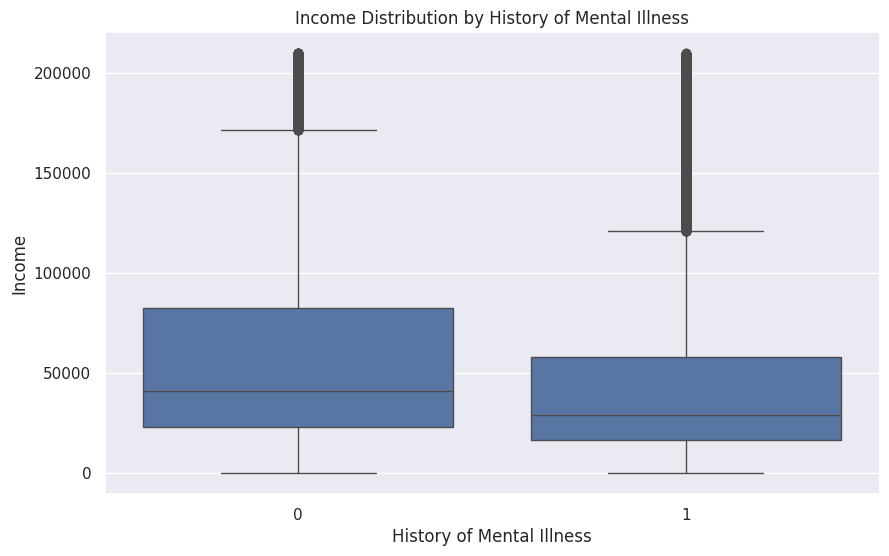

In [46]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='History of Mental Illness', y='Income', data=df)
plt.title('Income Distribution by History of Mental Illness')
plt.xlabel('History of Mental Illness')
plt.ylabel('Income')
plt.show()


#### **Key Observations**

1. **Median Income**:
   - The median income for individuals with no history of mental illness (0) is higher than for those with a history of mental illness (1).

2. **Income Spread**:
   - Both groups have a similar spread of income, as indicated by the height of the boxes and the length of the whiskers.
   
3. **Outliers**:
   - There are outliers in both groups, indicating that some individuals have incomes significantly higher or lower than the typical range.

####Conclusion:

The box plot highlights a potential impact of mental illness history on income distribution, where individuals with no history of mental illness tend to have higher median incomes compared to those with a history of mental illness. Understanding this relationship can be important for identifying socioeconomic factors associated with mental health.

##**Creating Model Prediction**

###**Correlation Heatmap**

In [32]:
df.drop(columns=['Age Group'], inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
objList = df.select_dtypes(include = "object").columns

for obj in objList:
  df[obj] = lb.fit_transform(df[obj].astype(str))

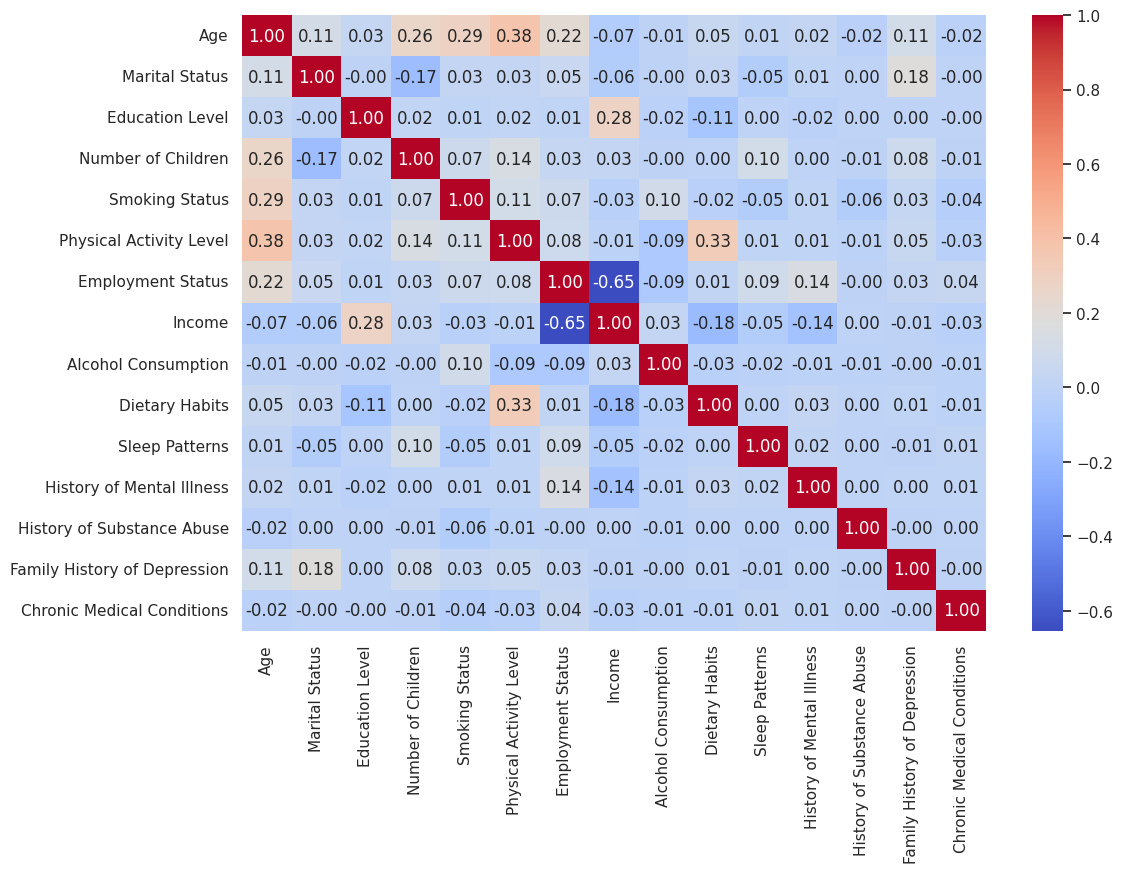

In [34]:
corr = df.corr()
sns.set(rc={'figure.figsize': (12, 8)})
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

#### Correlation of History of Mental Illness with Other Factors

Based on the correlation matrix from the heatmap, here are the correlation coefficients between the history of mental illness and various other health and lifestyle factors:

1. **Employment Status**: 0.14
   - Moderate positive correlation, indicating that individuals with a history of mental illness are more likely to be unemployed.

2. **Income**: -0.14
   - Moderate negative correlation, suggesting that individuals with a history of mental illness tend to have lower incomes.

3. **History of Substance Abuse**: 0.14
    - Moderate positive correlation, indicating that individuals with a history of mental illness are more likely to have a history of substance abuse.

#### Overall Insight

The data highlights moderate correlations between history of mental illness and factors such as employment status, income, and history of substance abuse. These insights suggest that individuals with a history of mental illness are more likely to face employment challenges, have lower incomes, and have experienced substance abuse issues. Other factors show minimal or negligible correlations.

###**Logictis Regression**

In [35]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = df.drop(columns=['History of Mental Illness'])
y = df['History of Mental Illness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit logistic regression model
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

# Predicting the probabilities
predictions = model.predict(X_test)

threshold = 0.5
predicted_classes = np.where(predictions > threshold, 1, 0)
predicted_classes

val_correct = np.sum(predicted_classes == y_test)
val_all = np.size(predicted_classes)
accuracy = val_correct / val_all

print(f'Accuracy: {accuracy}')

Optimization terminated successfully.
         Current function value: 0.602386
         Iterations 5
                               Logit Regression Results                              
Dep. Variable:     History of Mental Illness   No. Observations:               331014
Model:                                 Logit   Df Residuals:                   330999
Method:                                  MLE   Df Model:                           14
Date:                       Mon, 30 Dec 2024   Pseudo R-squ.:                 0.01933
Time:                               13:41:25   Log-Likelihood:            -1.9940e+05
converged:                              True   LL-Null:                   -2.0333e+05
Covariance Type:                   nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### **Key Insights from the Logistic Regression Model**

The logistic regression analysis explores the relationship between various predictors and the likelihood of having a history of mental illness. Here are the key insights from the model:

1. **Significant Predictors**:
   - **Income (p-value: 0.000)**: Higher income is associated with a lower likelihood of having a history of mental illness, as indicated by the negative coefficient (-4.558e-06).
   - **Employment Status (p-value: 0.000)**: Being employed is associated with a higher likelihood of having a history of mental illness, with a positive coefficient (0.3807).
   - **History of Substance Abuse (p-value: 0.023)**: Individuals with a history of substance abuse are more likely to have a history of mental illness, as shown by the positive coefficient (0.0913).
   - **Family History of Depression (p-value: 0.000)**: Having a family history of depression is linked to a higher likelihood of having a history of mental illness, with a positive coefficient (0.0950).

2. **Non-Significant Predictors**:
   - Variables such as age, marital status, education level, number of children, smoking status, physical activity level, alcohol consumption, dietary habits, sleep patterns, and chronic medical conditions have p-values greater than 0.05, indicating they are not statistically significant predictors in this model.

3. **Model Fit**:
   - The **Pseudo R-squared value** is 0.0193, suggesting that the model explains approximately 1.93% of the variance in the dependent variable (history of mental illness).
   - The **Log-Likelihood** value and the **LLR p-value** provide additional information about the model fit, indicating the overall significance of the model.

#### Overall Insight:

The model identifies several significant predictors of a history of mental illness, with income, employment status, history of substance abuse, and family history of depression being the most notable. Higher income is associated with a lower likelihood of having a history of mental illness, while being employed, having a history of substance abuse, and having a family history of depression are associated with a higher likelihood.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features and target variable
X = df.drop(columns=['History of Mental Illness'])
y = df['History of Mental Illness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Analyze feature importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)


Accuracy: 0.6641612490030694
Feature Importances:
                         Feature  Importance
7                         Income    0.388671
0                            Age    0.249901
3             Number of Children    0.057259
8            Alcohol Consumption    0.040443
2                Education Level    0.036566
5        Physical Activity Level    0.033874
4                 Smoking Status    0.029311
9                 Dietary Habits    0.029125
1                 Marital Status    0.027599
10                Sleep Patterns    0.026182
13    Chronic Medical Conditions    0.023782
11    History of Substance Abuse    0.023175
12  Family History of Depression    0.022739
6              Employment Status    0.011373


####**Key Insights from the Random Forest Model**
Based on the Random Forest model, here are the key insights:

Model Accuracy:

The model has an accuracy of approximately 0.66, meaning it correctly predicts the target variable (History of Mental Illness) about 66% of the time.

Top Features by Importance:

Income: With an importance score of 0.388, income is the most significant predictor of whether an individual has a history of mental illness.

Age: Age is the second most important feature, with an importance score of 0.250. This indicates that age plays a substantial role in predicting the history of mental illness.

Number of Children: This feature has an importance score of 0.058, showing a moderate influence on the prediction.

Other Notable Features:

Alcohol Consumption (0.040): Suggests a moderate relationship between alcohol consumption and the history of mental illness.

Education Level (0.037): Indicates the role of education in mental health history.

Physical Activity Level (0.034): Highlights the impact of physical activity on mental health.

Smoking Status (0.029): Shows the influence of smoking habits.

Dietary Habits (0.029): Reflects the role of diet in mental health.

Marital Status (0.028): Suggests the impact of marital status on mental health history.

Sleep Patterns (0.026): Indicates the significance of sleep patterns.

Chronic Medical Conditions (0.024): Highlights the role of chronic medical conditions.

History of Substance Abuse (0.023): Shows the influence of substance abuse history.

Family History of Depression (0.023): Reflects the genetic or environmental influence.

Employment Status (0.011): Suggests a relatively lesser impact.

## **Actionable Recommendations**

Based on the logistic regression analysis and key insights, here are some actionable recommendations for families, psychologists, and medical social workers:

#### 1. **For Families:**
 - **Income Support**: Lower income is associated with a higher likelihood of a history of mental illness. Families should be aware of financial stressors and seek financial counseling or support services to mitigate this risk.
 - *Action*: Explore local and national financial aid programs, budgeting workshops, and financial literacy resources.
 - **Physical Activity**: Higher physical activity levels are associated with a lower likelihood of mental illness. Families should encourage regular physical activity as a preventive measure.
 - *Action*: Engage in family-friendly physical activities like walking, biking, or participating in community sports programs.
 - **Dietary Habits and Sleep Patterns**: Although not significantly significant, promoting healthy eating and good sleep hygiene can contribute to better mental health.
 - *Action*: Implement balanced meal plans and establish consistent sleep routines.

#### 2. **For Psychologists:**
 - **Income and Employment**: Socioeconomic factors significantly impact mental health. Psychologists should consider these factors when assessing and treating patients.
 - *Action*: Integrate socio-economic assessments into the initial consultation process and provide resources for job training and financial management.
 - **Substance Abuse History**: A significant relationship exists between substance abuse and mental illness. Psychologists should address substance abuse in treatment plans.
 - *Action*: Incorporate substance abuse counseling and support into mental health treatment protocols.
 - **Family History**: The familial component to mental illness should be considered during patient assessments.
 - *Action*: Take detailed family histories and consider genetic counseling when appropriate.

#### 3. **For Medical Social Workers:**
 - **Holistic Approach**: Address various factors influencing mental health, including financial, employment, and lifestyle factors.
 - *Action*: Conduct comprehensive assessments covering all aspects of an individual's life and tailor support services accordingly.
 - **Resource Allocation**: Connect clients with financial aid, job placement services, and community resources to mitigate the impacts of low income and unemployment on mental health.
 - *Action*: Develop a network of local resources and service providers to refer clients for additional support.
 - **Education and Advocacy**: Educate families and communities on the importance of physical activity, healthy dietary habits, and good sleep hygiene.
 - *Action*: Organize workshops, seminars, and community events to promote mental health awareness and advocate for policies supporting mental health services.

### Summary
These systems are based on the significant factors identified in the logistic regression analysis and are aimed at improving the mental health and well-being of individuals through targeted interventions and support. By addressing these factors, families, psychologists, and medical social workers can work together to reduce the tendency of depression and enhance overall mental health outcomes. If you need further details or have additional questions, feel free to ask!